In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import seaborn as sns
import numpy as np
import plotly
import geopandas as gpd

# Checking versions
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("NumPy version:", np.__version__)
print("Plotly Express version:", plotly.__version__)  # Accessing version from the main plotly module
print("Geopandas version:", gpd.__version__)


Pandas version: 2.2.1
Matplotlib version: 3.8.3
Seaborn version: 0.13.2
NumPy version: 1.26.4
Plotly Express version: 5.19.0
Geopandas version: 0.14.3


In [2]:
emissions =pd.read_csv("data/food-emissions-supply-chain.csv")
ghg = pd.read_csv("data/ghg-per-kg-poore.csv")
co2 = pd.read_csv("data/owid-co2-data.csv")
countries = pd.read_csv("data/countries.csv")
world = pd.read_csv("data/world_country.csv")
agricultur = pd.read_csv("data/FAOSTAT_data_en_3-25-2024.csv")

# Data cleaning

# EDA

In [3]:
# Check for missing values
print("Missing values before cleaning:")
print(agricultur.isnull().sum())


# Check data types
print(agricultur.dtypes)

# Remove duplicates
agricultur.drop_duplicates(inplace=True)



# Save the cleaned dataset
agricultur.to_csv("cleaned_agricultur.csv", index=False)


Missing values before cleaning:
Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64
Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object


In [4]:
# Remove duplicates
agricultur.drop_duplicates(inplace=True)

# Save the cleaned dataset
agricultur.to_csv("cleaned_agricultur.csv", index=False)


  Domain Code                                    Domain  Area Code (M49)  \
0          GN  Emissions from Energy use in agriculture                4   
1          GN  Emissions from Energy use in agriculture                4   
2          GN  Emissions from Energy use in agriculture                4   
3          GN  Emissions from Energy use in agriculture                4   
4          GN  Emissions from Energy use in agriculture                4   

          Area  Element Code          Element  Item Code         Item  \
0  Afghanistan          7273  Emissions (CO2)       6807  Electricity   
1  Afghanistan          7273  Emissions (CO2)       6807  Electricity   
2  Afghanistan          7273  Emissions (CO2)       6807  Electricity   
3  Afghanistan          7273  Emissions (CO2)       6807  Electricity   
4  Afghanistan          7273  Emissions (CO2)       6807  Electricity   

   Year Code  Year Unit   Value Flag Flag Description  
0       1970  1970   kt  4.1799    A  Official f

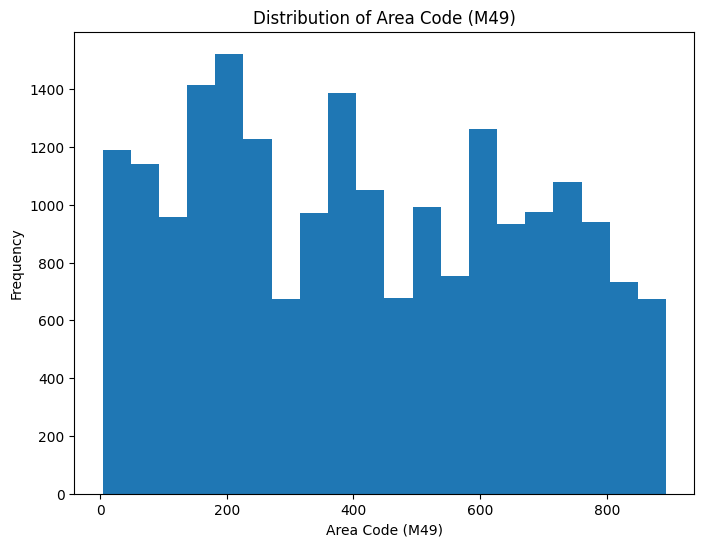

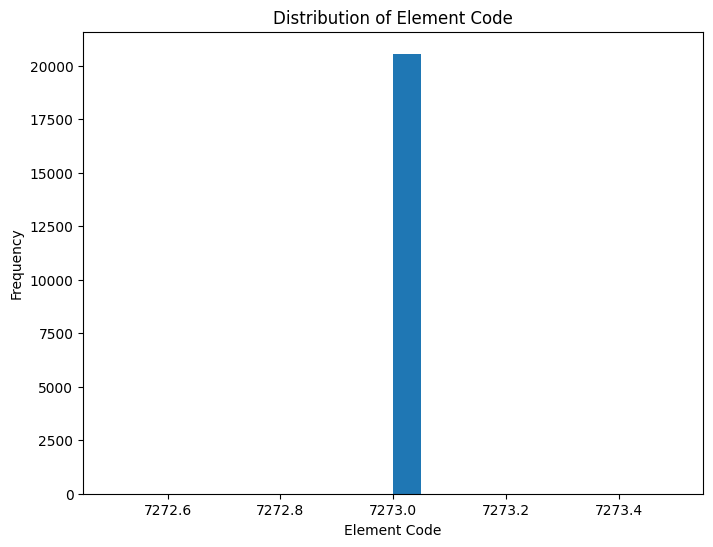

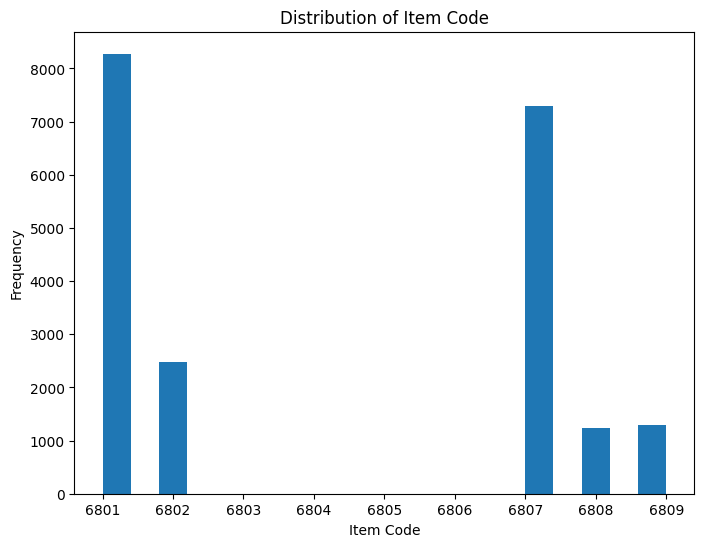

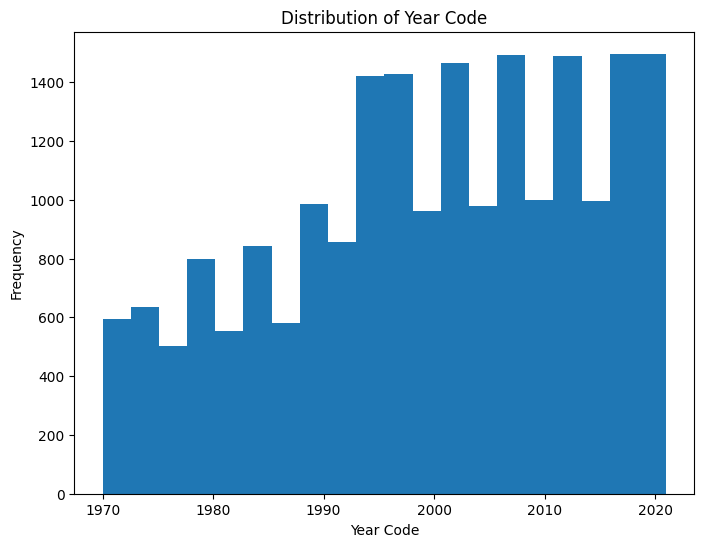

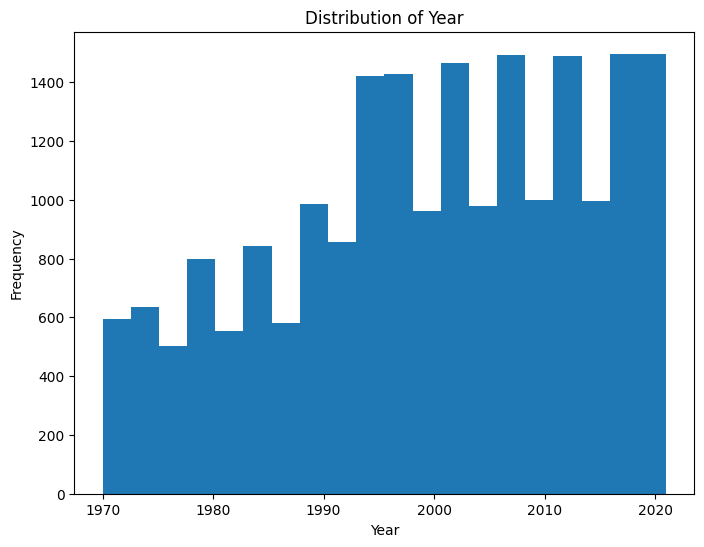

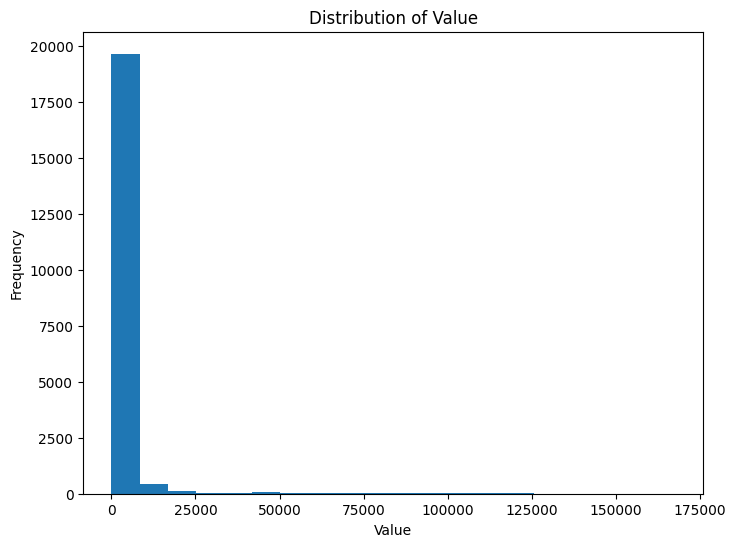

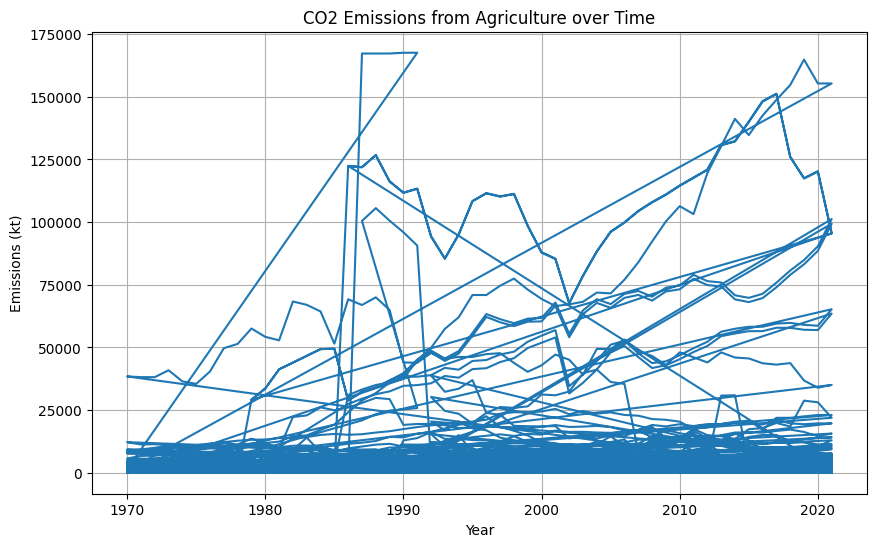

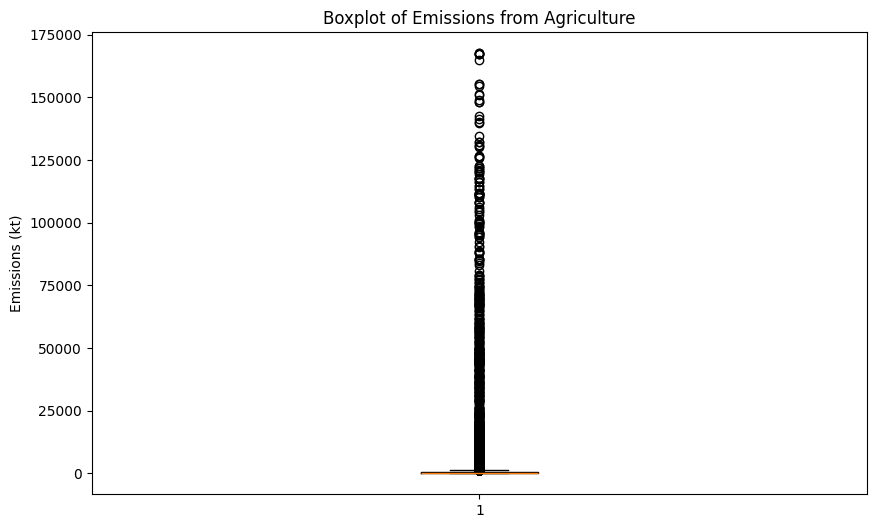

In [5]:
# Check the structure of the dataset
print(agricultur.head())
print(agricultur.info())

# Summary statistics
print(agricultur.describe())

# Check for missing values
print(agricultur.isnull().sum())

# Distribution of numerical variables
numerical_cols = agricultur.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(agricultur[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Time trends
plt.figure(figsize=(10, 6))
plt.plot(agricultur['Year'], agricultur['Value'])
plt.title('CO2 Emissions from Agriculture over Time')
plt.xlabel('Year')
plt.ylabel('Emissions (kt)')
plt.grid(True)
plt.show()


# Outlier detection
plt.figure(figsize=(10, 6))
plt.boxplot(agricultur['Value'])
plt.title('Boxplot of Emissions from Agriculture')
plt.ylabel('Emissions (kt)')
plt.show()


### co2


In [6]:
# Display basic information about the dataset
print(co2.info())

# Display the first few rows of the dataset
print(co2.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   39717 non-null  object 
 3   population                                 39495 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            25136 non-null  float64
 10  co2_including_luc     

In [7]:
# Check for missing values in the dataset
missing_values = co2.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)


iso_code                        8341
population                      8563
gdp                            33494
cement_co2                     24294
cement_co2_per_capita          26041
                               ...  
temperature_change_from_n2o    10438
total_ghg                      41704
total_ghg_excluding_lucf       41704
trade_co2                      43660
trade_co2_share                43661
Length: 77, dtype: int64


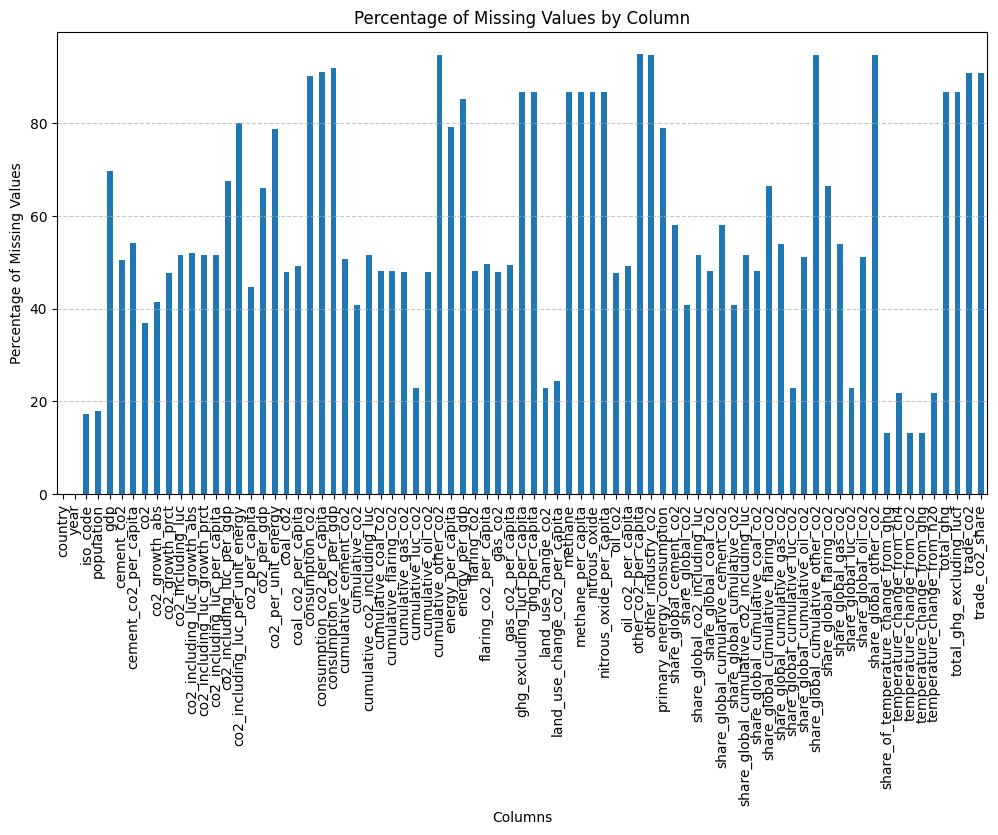

In [8]:
# Calculate the percentage of missing values in each column
missing_percentage = (co2.isnull().sum() / len(co2)) * 100

# Plot the distribution of missing values
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
# Summary statistics for numerical variables in the CO2 dataset
summary_statistics = co2.describe()

# Display the summary statistics
print(summary_statistics)


               year    population           gdp    cement_co2  \
count  48058.000000  3.949500e+04  1.456400e+04  23764.000000   
mean    1926.842565  6.083223e+07  2.677586e+11      9.109400   
std       59.414846  3.285867e+08  2.103151e+12     66.463548   
min     1750.000000  2.220000e+02  4.998000e+07      0.000000   
25%     1883.000000  3.464375e+05  7.516679e+09      0.000000   
50%     1930.000000  2.456362e+06  2.597999e+10      0.029000   
75%     1976.000000  1.008038e+07  1.132942e+11      0.834000   
max     2022.000000  7.975105e+09  1.136302e+14   1692.404000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count           22017.000000  30308.000000    28157.000000     25136.000000   
mean                0.066798    391.272161        5.868310        20.055703   
std                 0.125367   1855.824655       59.845871       687.366449   
min                 0.000000      0.000000    -2032.366000      -100.000000   
25%                

count: Number of non-null values in each column.
mean: Mean of the values in each column.
std: Standard deviation of the values in each column.
min: Minimum value in each column.
25%: 25th percentile (Q1) of the values in each column.
50%: Median (50th percentile or Q2) of the values in each column.
75%: 75th percentile (Q3) of the values in each column.
max: Maximum value in each column.
Here are some observations based on the summary statistics:

The number of non-null values varies for different columns, indicating missing data.
The mean, standard deviation, minimum, maximum, and quartile values provide insights into the distribution and range of each numerical variable.
For some variables, such as population, GDP, and CO2 emissions, the range of values is quite large, indicating variability across countries and years.
The standard deviation reflects the dispersion of values around the mean for each variable.

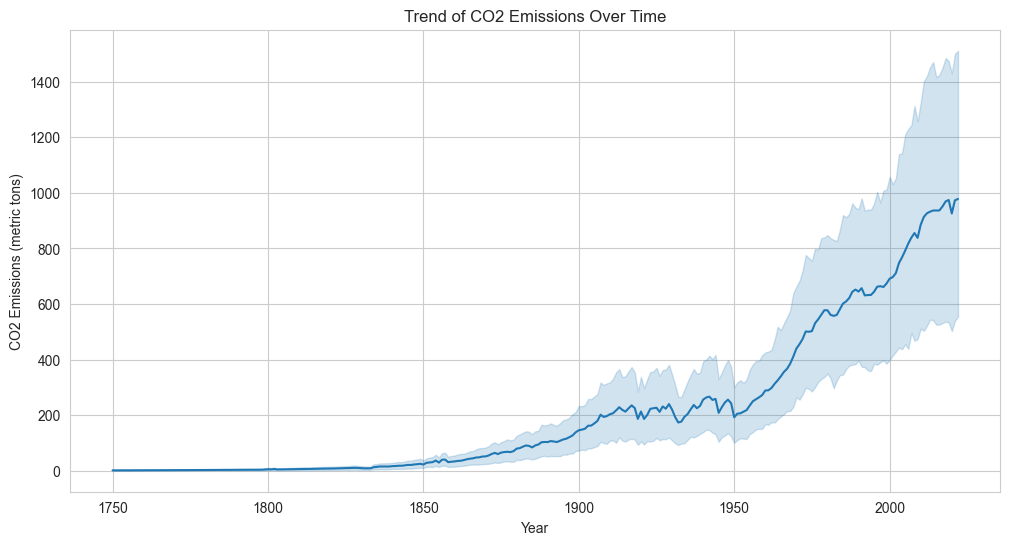

In [10]:
# Set the style
sns.set_style("whitegrid")

# Plot CO2 emissions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=co2, x='year', y='co2')
plt.title('Trend of CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tons)')
plt.show()


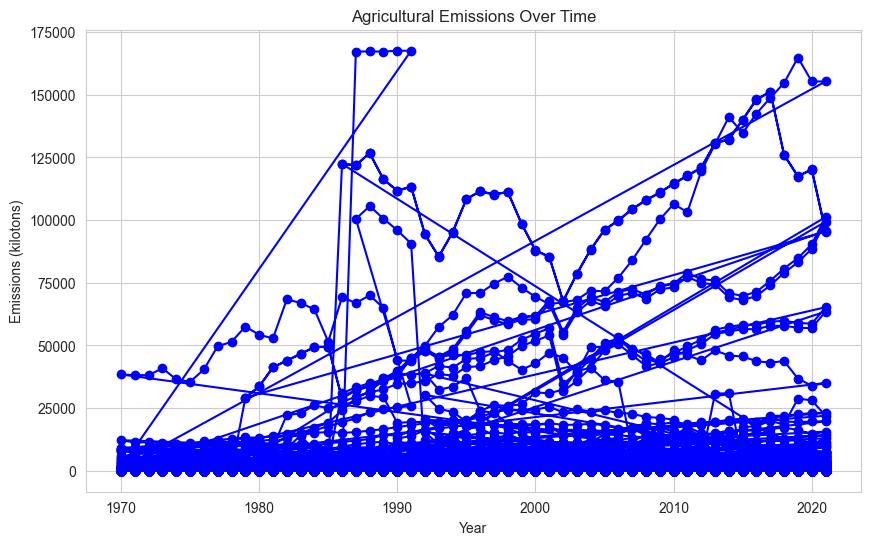

In [11]:
# Plotting a line plot for agricultural emissions
plt.figure(figsize=(10, 6))
plt.plot(agricultur['Year'], agricultur['Value'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Emissions (kilotons)')
plt.title('Agricultural Emissions Over Time')
plt.grid(True)
plt.show()


In [12]:
co2_merged = pd.merge(co2, countries, how='left', left_on='country', right_on='name')


In [13]:
# Calculate the total CO2 emissions for each continent
total_co2_by_continent = co2_merged.groupby('region')['co2'].sum()

# Calculate the total CO2 emissions across all continents
total_global_co2 = total_co2_by_continent.sum()

# Calculate the percentage of emissions contributed by each continent
percentage_by_continent = (total_co2_by_continent / total_global_co2) * 100

# Print the percentage of CO2 emissions for each continent
for continent, percentage in percentage_by_continent.items():
    print(f"The total CO2 emissions for {continent} account for {percentage:.2f}% of total emissions across all continents.")


The total CO2 emissions for Africa account for 4.86% of total emissions across all continents.
The total CO2 emissions for Americas account for 9.66% of total emissions across all continents.
The total CO2 emissions for Asia account for 50.14% of total emissions across all continents.
The total CO2 emissions for Europe account for 33.23% of total emissions across all continents.
The total CO2 emissions for Oceania account for 2.11% of total emissions across all continents.


In [14]:
# Calculate the total CO2 emissions for each continent
total_co2_by_continent_year = co2_merged.groupby(['region', 'year'])['co2'].sum().reset_index()

# Calculate the total CO2 emissions for each continent across all years
total_co2_by_continent = total_co2_by_continent_year.groupby('region')['co2'].sum()

# Calculate the total global CO2 emissions across all continents and years
total_global_co2 = total_co2_by_continent.sum()

# Calculate the percentage of emissions contributed by each continent
percentage_by_continent = (total_co2_by_continent / total_global_co2) * 100

# Print the percentage of CO2 emissions for each continent
for continent, percentage in percentage_by_continent.items():
    print(f"The total CO2 emissions for {continent} account for {percentage:.2f}% of total emissions across all continents.")


The total CO2 emissions for Africa account for 4.86% of total emissions across all continents.
The total CO2 emissions for Americas account for 9.66% of total emissions across all continents.
The total CO2 emissions for Asia account for 50.14% of total emissions across all continents.
The total CO2 emissions for Europe account for 33.23% of total emissions across all continents.
The total CO2 emissions for Oceania account for 2.11% of total emissions across all continents.


/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_4616/1708605451.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=total_co2_by_continent, x='year', y='co2_tonnes', hue='region', ci=None, markers=True, dashes=False, markersize=5)


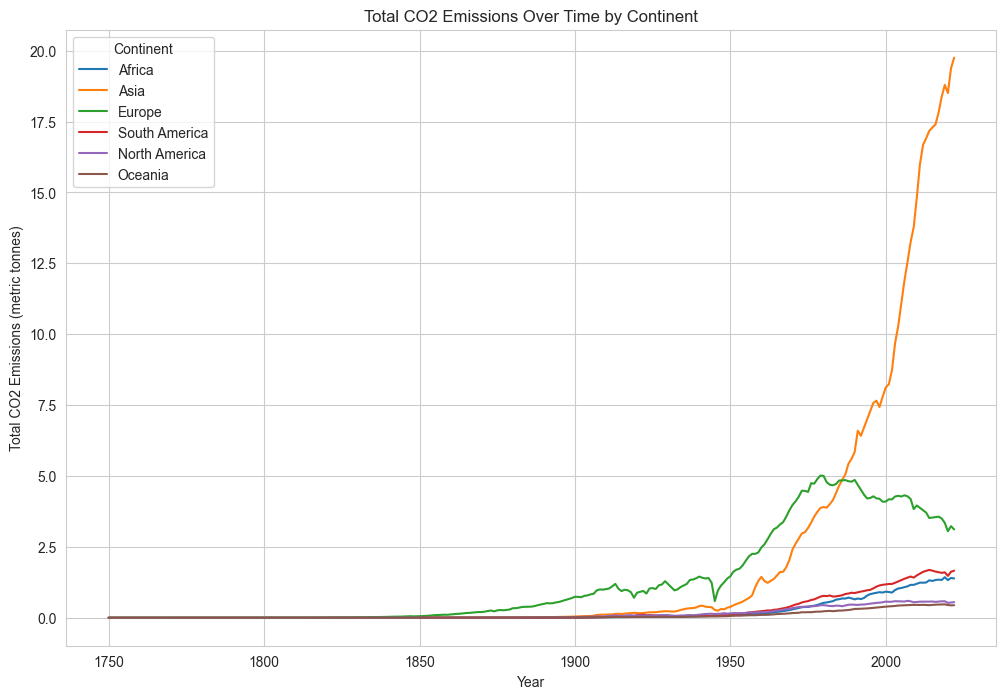

In [15]:
# Split 'Americas' into 'North America' and 'South America'
co2_merged.loc[co2_merged['region'] == 'Americas', 'region'] = co2_merged.loc[co2_merged['region'] == 'Americas', 'sub-region']

# Calculate the total CO2 emissions for each continent and year
total_co2_by_continent = co2_merged.groupby(['region', 'year'])['co2'].sum().reset_index()

# Convert CO2 emissions from kilotons to metric tonnes
total_co2_by_continent['co2_tonnes'] = total_co2_by_continent['co2'] / 1000  # 1 kiloton = 1000 metric tonnes

# Rename 'North America' and 'South America'
total_co2_by_continent['region'] = total_co2_by_continent['region'].replace({'Northern America': 'North America', 'Latin America and the Caribbean': 'South America'})

# Plot the total CO2 emissions over time per continent
plt.figure(figsize=(12, 8))
sns.lineplot(data=total_co2_by_continent, x='year', y='co2_tonnes', hue='region', ci=None, markers=True, dashes=False, markersize=5)
plt.title('Total CO2 Emissions Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (metric tonnes)')
plt.legend(title='Continent')

plt.show()


/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_4616/3817657807.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=total_co2_by_continent, x='year', y='co2_tonnes', hue='region', ci=None, markers=True, dashes=False, markersize=5)


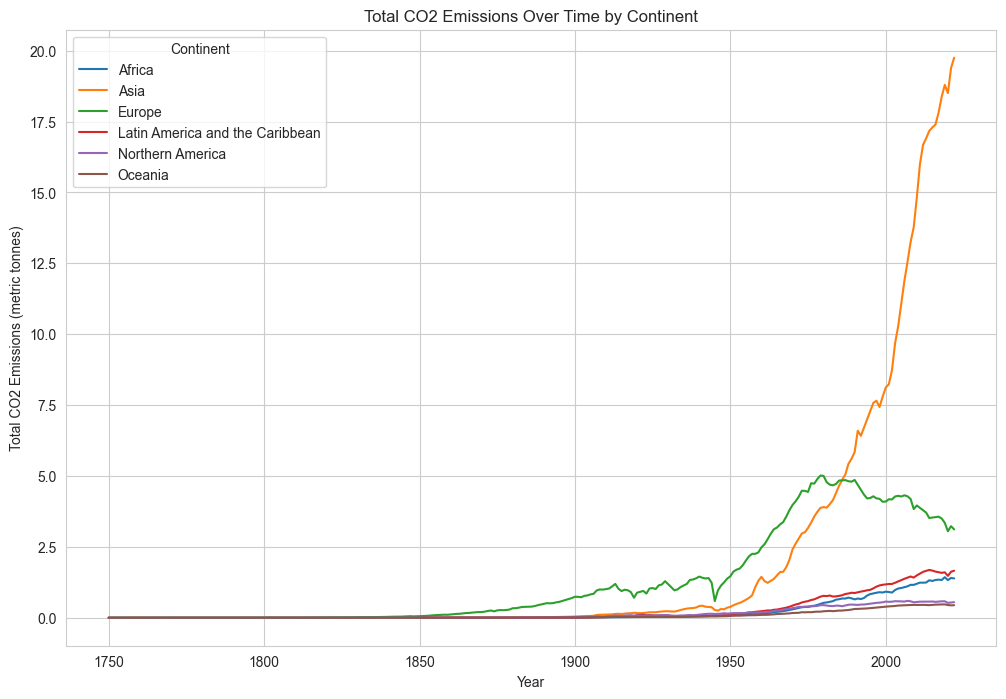

In [16]:
# Calculate the total CO2 emissions for each continent and year
total_co2_by_continent = co2_merged.groupby(['region', 'year'])['co2'].sum().reset_index()

# Convert CO2 emissions from kilotons to metric tonnes
total_co2_by_continent['co2_tonnes'] = total_co2_by_continent['co2'] / 1000  # 1 kiloton = 1000 metric tonnes

# Plot the total CO2 emissions over time per continent
plt.figure(figsize=(12, 8))
sns.lineplot(data=total_co2_by_continent, x='year', y='co2_tonnes', hue='region', ci=None, markers=True, dashes=False, markersize=5)
plt.title('Total CO2 Emissions Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (metric tonnes)')
plt.legend(title='Continent')

plt.show()



The plot shows the trend of CO2 emissions over time. The x-axis represents the years, and the y-axis represents the amount of CO2 emissions in million metric tons. In this particular plot:



In [17]:
co2_merged.head()

country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3767956.0  NaN         NaN   
2  Afghanistan  1852      AFG   3783940.0  NaN         NaN   
3  Afghanistan  1853      AFG   3800954.0  NaN         NaN   
4  Afghanistan  1854      AFG   3818038.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  alpha-2  \
0                    NaN  NaN             NaN              NaN  ...       AF   
1                    NaN  NaN             NaN              NaN  ...       AF   
2                    NaN  NaN             NaN              NaN  ...       AF   
3                    NaN  NaN             NaN              NaN  ...       AF   
4                    NaN  NaN             NaN              NaN  ...       AF   

   alpha-3  country-code     iso_3166-2  region     sub-region  \
0      AFG           4.0  ISO 3166-2:AF    Asia  Southern Asia   
1      AFG           4.0  ISO 3166-2:AF    Asia  Southern Asia   
2      AFG           4.0  ISO 3166-2:AF    Asia  Southern Asia   
3      AFG           4.0  ISO 3166-2:AF    Asia  Southern Asia   
4      AFG           4.0  ISO 3166-2:AF    Asia  Southern Asia   

   intermediate-region  region-code  sub-region-code  intermediate-region-code  
0                  NaN        142.0             34.0                       NaN  
1                  NaN        142.0             34.0                       NaN  
2                  NaN        142.0             34.0                       NaN  
3                  NaN        142.0             34.0                       NaN  
4                  NaN        142.0             34.0                       NaN  

[5 rows x 90 columns]

In [18]:
# Convert CO2 emissions from kilotons to metric tonnes
co2_merged['co2_tonnes_total'] = co2_merged.groupby('year')['co2'].transform('sum')


/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_4616/1906998241.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=co2_merged, x='year', y='co2_tonnes_total', hue='region', ci=None, markers=True, dashes=False, markersize=5)


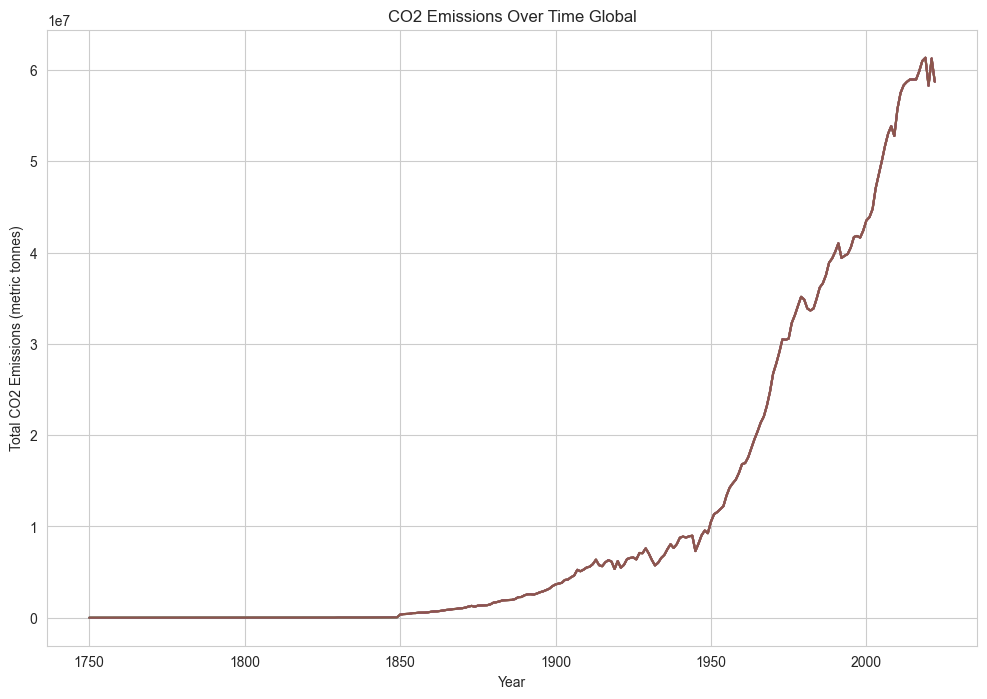

In [19]:
# Set the color palette
sns.set_palette("tab10")


# Convert CO2 emissions from kilotons to metric tonnes
co2_merged['co2_tonnes_total'] = co2_merged.groupby('year')['co2_tonnes_total'].transform('sum')

# Plot the total CO2 emissions over time colored by continent
plt.figure(figsize=(12, 8))
sns.lineplot(data=co2_merged, x='year', y='co2_tonnes_total', hue='region', ci=None, markers=True, dashes=False, markersize=5)
plt.title('CO2 Emissions Over Time Global')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (metric tonnes)')
plt.legend().set_visible(False)  # Show legend

plt.show()


In [20]:
# Merge the CO2 emissions dataset with the countries dataset based on country codes
co2_with_countries = pd.merge(co2, countries, left_on='iso_code', right_on='alpha-3', how='left')

# Check the merged dataset
print(co2_with_countries.head())


       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3767956.0  NaN         NaN   
2  Afghanistan  1852      AFG   3783940.0  NaN         NaN   
3  Afghanistan  1853      AFG   3800954.0  NaN         NaN   
4  Afghanistan  1854      AFG   3818038.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  alpha-2  \
0                    NaN  NaN             NaN              NaN  ...       AF   
1                    NaN  NaN             NaN              NaN  ...       AF   
2                    NaN  NaN             NaN              NaN  ...       AF   
3                    NaN  NaN             NaN              NaN  ...       AF   
4                    NaN  NaN             NaN              NaN  ...       AF   

   alpha-3  country-code     iso_3166-2  region     sub-region  \
0      AFG           4.0  ISO 3166-2:AF    Asia  Southern Asia   
1      AFG    

In [21]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Iterate over each continent
for continent, data in grouped_by_continent:
    # Check if the continent is Americas
    if continent == 'Americas':
        # Calculate total CO2 emissions for each country within the Americas
        total_co2_by_country = data.groupby('country')['co2'].sum()
        # Select the top emitting countries for the Americas
        top_emitters_americas = total_co2_by_country.nlargest(3)
        # Convert emissions to metric tonnes
        top_emitters_americas_tonnes = top_emitters_americas / 1000
        # Plot the top emitting countries for the Americas
        plt.bar(top_emitters_americas_tonnes.index, top_emitters_americas_tonnes.values, label='Americas')
    else:
        # Calculate total CO2 emissions for each country within the continent
        total_co2_by_country = data.groupby('country')['co2'].sum()
        # Select the top 3 emitting countries for the continent
        top_3_emitters = total_co2_by_country.nlargest(3)
        # Convert emissions to metric tonnes
        top_3_emitters_tonnes = top_3_emitters / 1000
        # Plot the top 3 emitting countries for the continent
        plt.bar(top_3_emitters_tonnes.index, top_3_emitters_tonnes.values, label=continent)

# Add labels and title
plt.title('Top CO2 Emitting Countries for Each Continent')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (Metric Tonnes)')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


NameError: name 'grouped_by_continent' is not defined

<Figure size 1200x800 with 0 Axes>

/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_4616/2767526637.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_asia['co2_tonnes'] = co2_asia['co2'] / 1000  # 1 kiloton = 1000 metric tonnes
/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_4616/2767526637.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=co2_top_5_asia, x='year', y='co2_tonnes', hue='country', ci=None, markers=True, dashes=False, markersize=5)


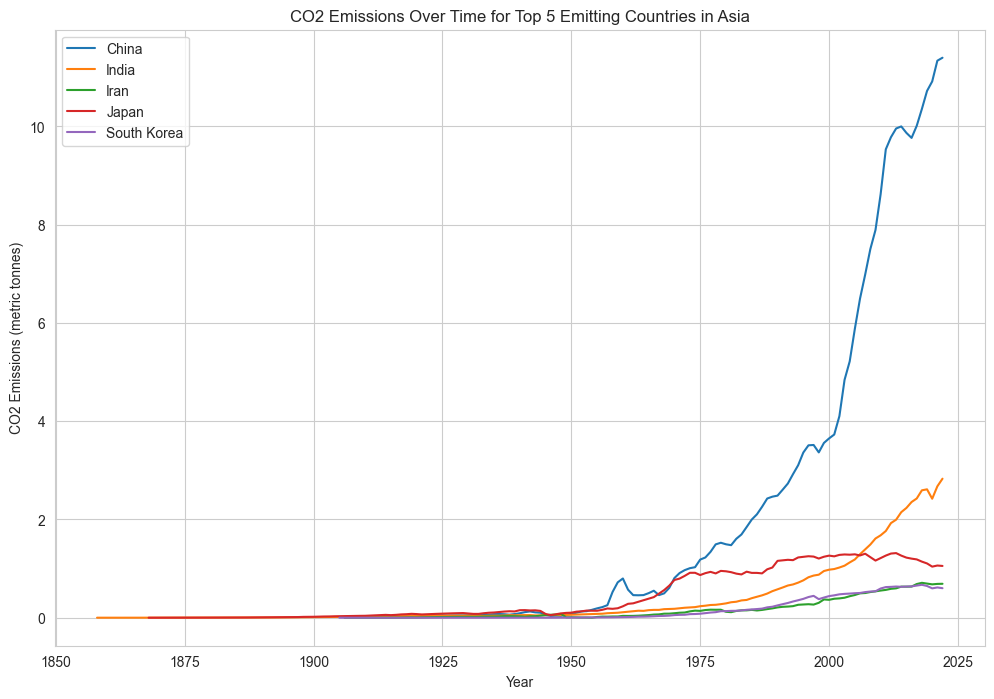

Top 5 emitting countries in Asia:
country
China          260619.243
Japan           67734.911
India           59740.694
Iran            19852.750
South Korea     19528.810
Name: co2, dtype: float64


In [22]:
# Filter the dataset to include only Asian countries
asian_countries = ['China', 'India', 'Japan', 'Indonesia', 'Iran', 'Saudi Arabia', 'South Korea', 'United Arab Emirates', 'Vietnam', 'Pakistan']
co2_asia = co2[co2['country'].isin(asian_countries)]

# Convert CO2 emissions from kilotons to metric tonnes
co2_asia['co2_tonnes'] = co2_asia['co2'] / 1000  # 1 kiloton = 1000 metric tonnes

# Calculate the total CO2 emissions for each country in Asia
total_co2_by_country_asia = co2_asia.groupby('country')['co2'].sum()

# Select the top 5 emitting countries based on total emissions in Asia
top_5_emitters_asia = total_co2_by_country_asia.nlargest(5)

# Filter the dataset to include only the top 5 emitters
co2_top_5_asia = co2_asia[co2_asia['country'].isin(top_5_emitters_asia.index)]

# Plot CO2 emissions over time for the top 5 emitting countries in Asia
plt.figure(figsize=(12, 8))
sns.lineplot(data=co2_top_5_asia, x='year', y='co2_tonnes', hue='country', ci=None, markers=True, dashes=False, markersize=5)
plt.title('CO2 Emissions Over Time for Top 5 Emitting Countries in Asia')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tonnes)')
plt.legend().set_visible(True)  # Show legend
plt.show()

print("Top 5 emitting countries in Asia:")
print(top_5_emitters_asia)


/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_4616/2123571357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_asia['co2_tonnes'] = co2_asia['co2'] / 1000  # 1 kiloton = 1000 metric tonnes
/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_4616/2123571357.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=co2_asia, x='year', y='co2_tonnes', hue='country', ci=None, markers=True, dashes=False, markersize=5)


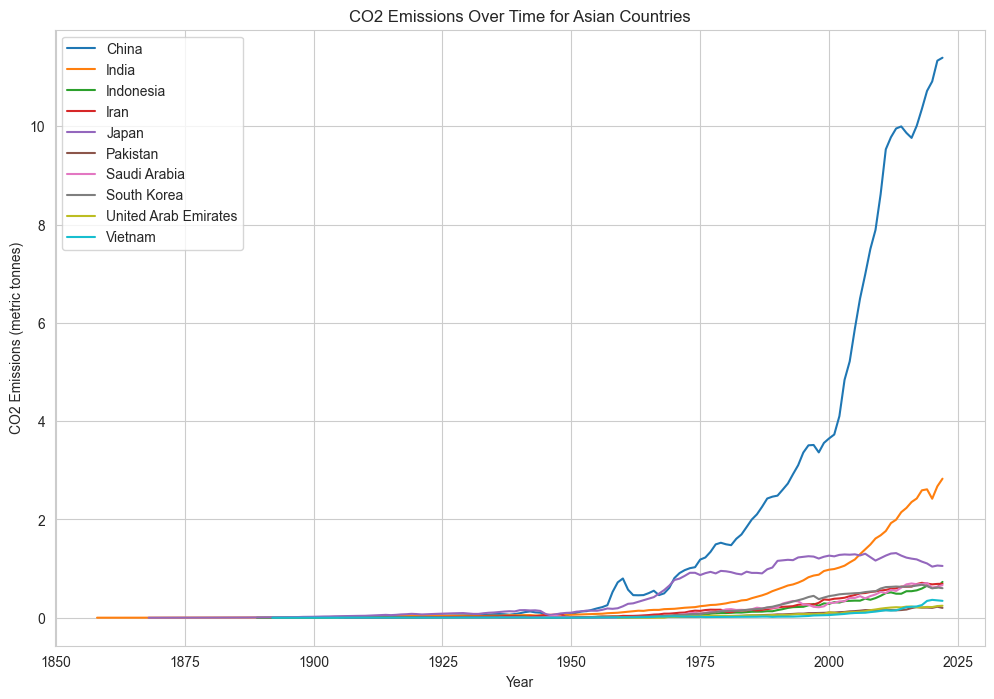

In [23]:
# Filter the dataset to include only Asian countries
asian_countries = ['China', 'India', 'Japan', 'Indonesia', 'Iran', 'Saudi Arabia', 'South Korea', 'United Arab Emirates', 'Vietnam', 'Pakistan']
co2_asia = co2[co2['country'].isin(asian_countries)]

# Convert CO2 emissions from kilotons to metric tonnes
co2_asia['co2_tonnes'] = co2_asia['co2'] / 1000  # 1 kiloton = 1000 metric tonnes

# Plot CO2 emissions over time for Asian countries in metric tonnes
plt.figure(figsize=(12, 8))
sns.lineplot(data=co2_asia, x='year', y='co2_tonnes', hue='country', ci=None, markers=True, dashes=False, markersize=5)
plt.title('CO2 Emissions Over Time for Asian Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tonnes)')
plt.legend().set_visible(True)  # Show legend
plt.show()


In [24]:
print(co2_merged.columns)


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

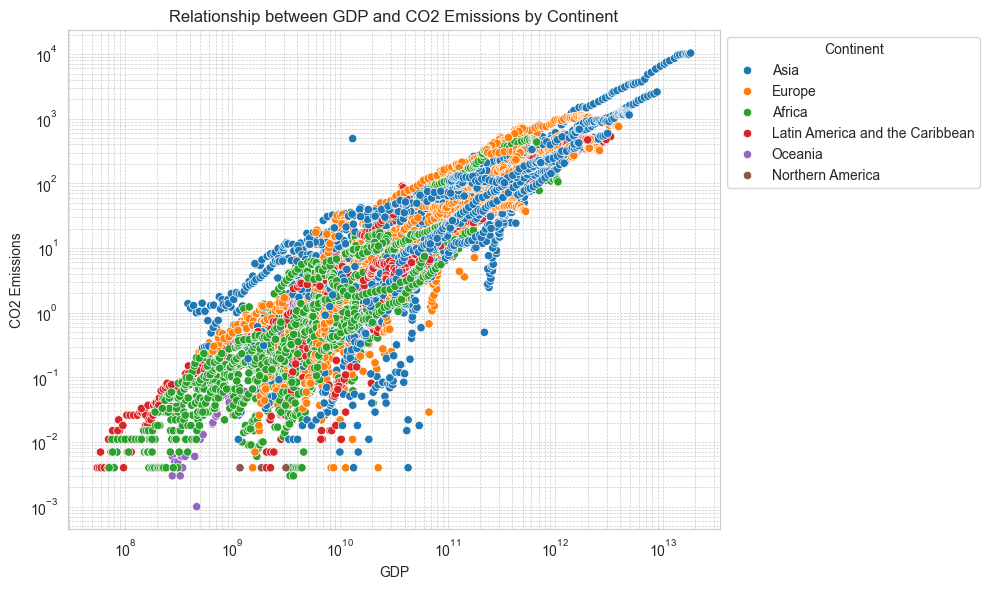

In [25]:
# Plot the relationship between GDP and CO2 emissions by continent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=co2_merged, x='gdp', y='co2', hue='region', palette='tab10')
plt.title('Relationship between GDP and CO2 Emissions by Continent')
plt.xlabel('GDP')
plt.ylabel('CO2 Emissions')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.yscale('log')  # Set y-axis to logarithmic scale for better visualization
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid lines
plt.tight_layout()
plt.show()


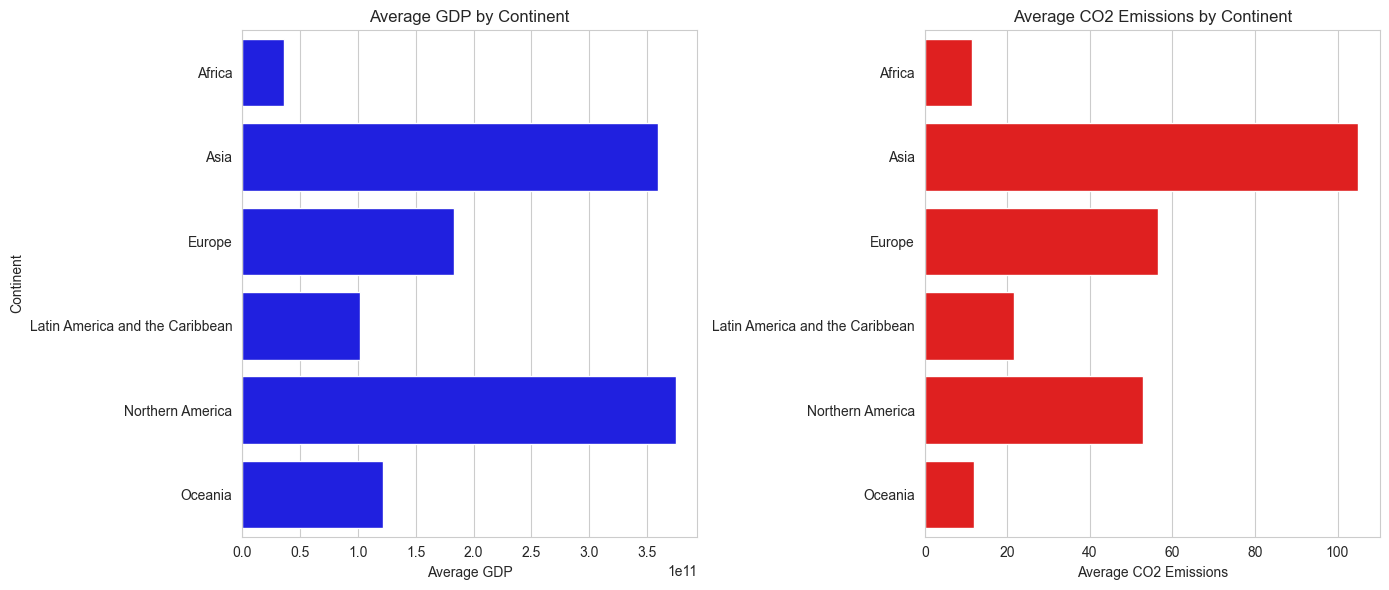

In [26]:
# Calculate the average GDP and CO2 emissions for each continent
average_data = co2_merged.groupby('region').agg({'gdp': 'mean', 'co2': 'mean'}).reset_index()

# Plot the average GDP and CO2 emissions by continent side by side
plt.figure(figsize=(14, 6))

# Plot average GDP
plt.subplot(1, 2, 1)
sns.barplot(data=average_data, x='gdp', y='region', color='blue')
plt.title('Average GDP by Continent')
plt.xlabel('Average GDP')
plt.ylabel('Continent')

# Plot average CO2 emissions
plt.subplot(1, 2, 2)
sns.barplot(data=average_data, x='co2', y='region', color='red')
plt.title('Average CO2 Emissions by Continent')
plt.xlabel('Average CO2 Emissions')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [35]:
# Merge the CO2 emissions data with agricultural emissions data based on the common column 'year'
combined_data = pd.merge(co2, agricultur, on='year_', how='inner')

# Plotting a line plot with legend
plt.figure(figsize=(10, 6))

# Plot CO2 emissions
plt.plot(combined_data['year'], combined_data['total_co2_tonnes'], label='Total CO2 Emissions', color='blue')

# Plot agricultural emissions
plt.plot(combined_data['year'], combined_data['agricultural_emissions'], label='Agricultural Emissions', color='green')

plt.xlabel('Year')
plt.ylabel('Emissions (metric tonnes)')
plt.title('CO2 Emissions vs Agricultural Emissions Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


KeyError: 'year_'

I show how the contributions of coal, oil, gas, and flaring change over the years

### Emissions

In [36]:
# Define a dictionary mapping old column names to new column names
column_rename_dict = {
    'food_emissions_land_use': 'f.e_land_use',
    'food_emissions_farm': 'f.e_farm',
    'food_emissions_animal_feed': 'f.e_animal_feed',
    'food_emissions_processing': 'f.e_processing',
    'food_emissions_transport': 'f.e_transport',
    'food_emissions_retail': 'f.e_retail',
    'food_emissions_packaging': 'f.e_packaging',
    'food_emissions_losses': 'f.e_losses'
}

# Rename the columns using the rename() function
emissions.rename(columns=column_rename_dict, inplace=True)


In [37]:
# Displaying the first few rows of the dataset
print(emissions.head())

# Checking the shape of the dataset
print("\nShape of the dataset:", emissions.shape)

# Displaying summary statistics
print("\nSummary statistics of the dataset:")
print(emissions.describe())

# Checking for missing values
print("\nMissing values in the dataset:")
print(emissions.isnull().sum())


              Entity  Code  Year  f.e_land_use   f.e_farm  f.e_animal_feed  \
0             Apples   NaN  2018     -0.028951   0.225816         0.000000   
1            Bananas   NaN  2018     -0.025534   0.269618         0.000000   
2             Barley   NaN  2018      0.008676   0.176377         0.000000   
3   Beef (beef herd)   NaN  2018     23.237536  56.228063         2.680979   
4  Beef (dairy herd)   NaN  2018      1.266022  21.915529         3.503673   

   f.e_processing  f.e_transport  f.e_retail  f.e_packaging  f.e_losses  
0        0.003820       0.095804    0.016578       0.044526    0.070808  
1        0.060146       0.295830    0.020981       0.065670    0.175185  
2        0.127703       0.035351    0.263587       0.496786    0.070692  
3        1.811083       0.494125    0.233538       0.352084   14.439998  
4        1.547664       0.592410    0.254032       0.374549    3.847515  

Shape of the dataset: (43, 11)

Summary statistics of the dataset:
       Code    Year

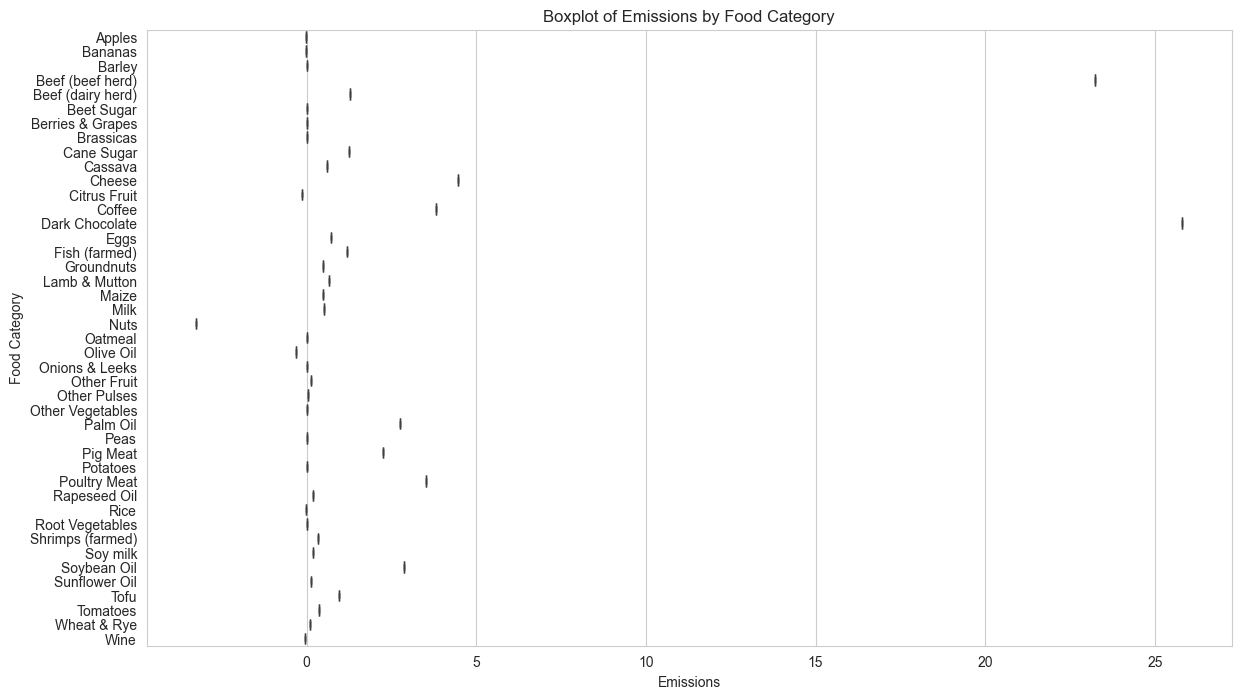

In [38]:
# Boxplot of Emissions by Food Category
plt.figure(figsize=(14, 8))
sns.boxplot(x='f.e_land_use', y='Entity', data=emissions)
plt.title('Boxplot of Emissions by Food Category')
plt.xlabel('Emissions')
plt.ylabel('Food Category')
plt.show()


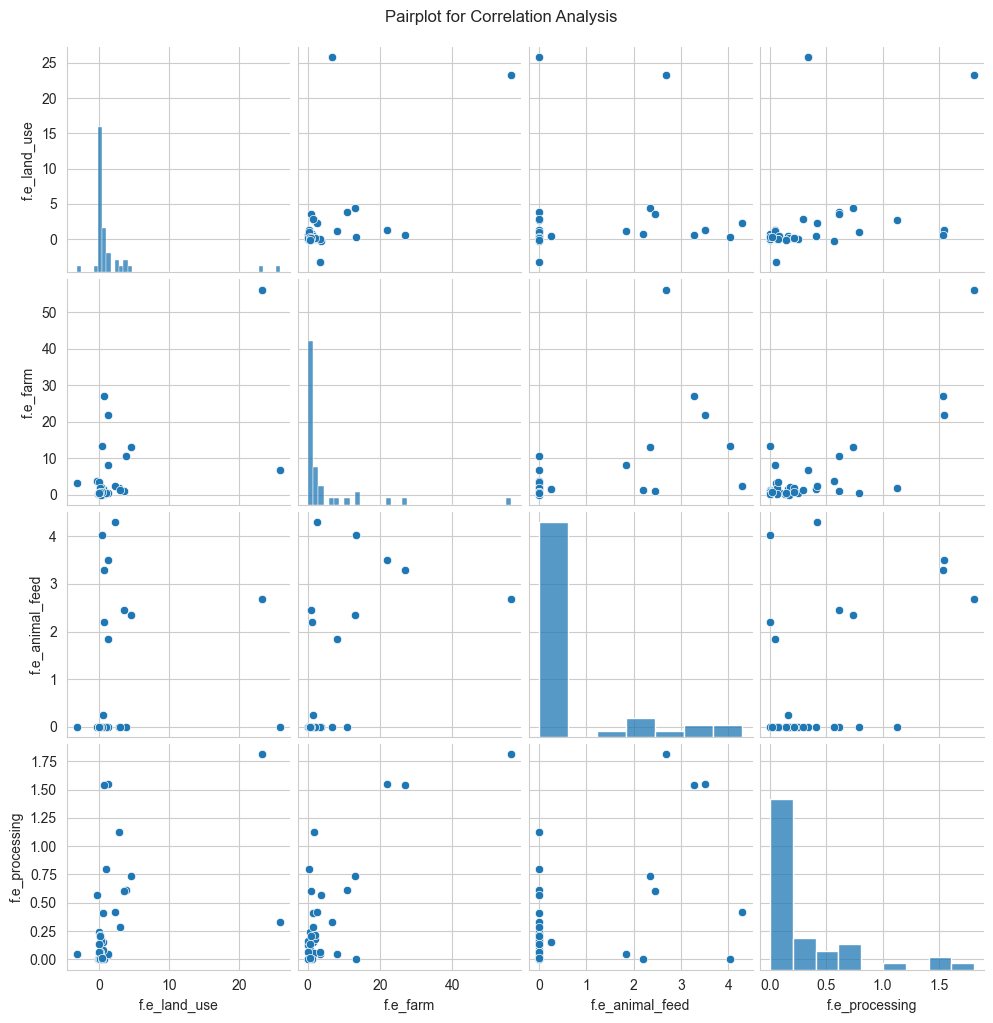

In [39]:
# Pairplot for Correlation Analysis
sns.pairplot(emissions[['f.e_land_use', 'f.e_farm', 'f.e_animal_feed', 'f.e_processing']])
plt.suptitle('Pairplot for Correlation Analysis', y=1.02)
plt.show()


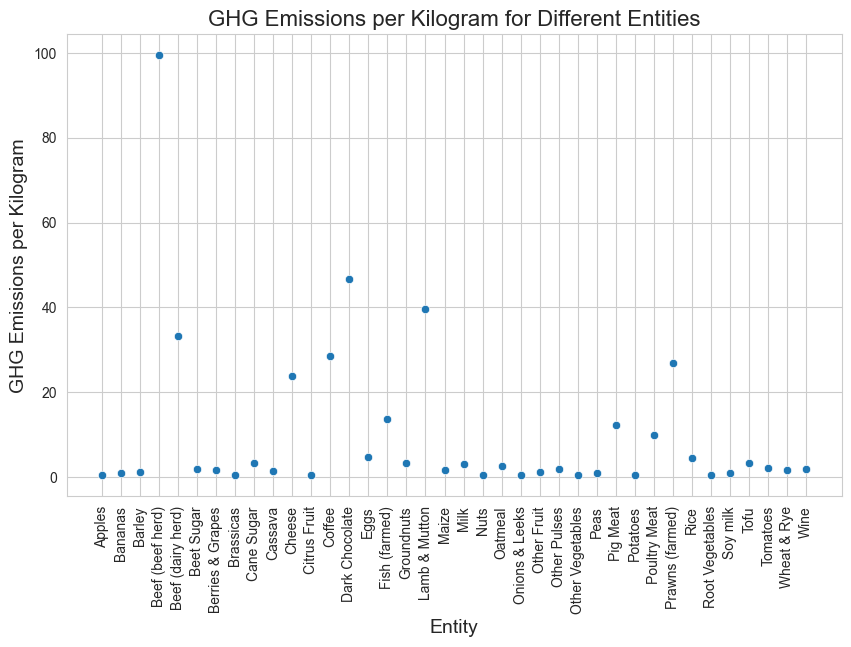

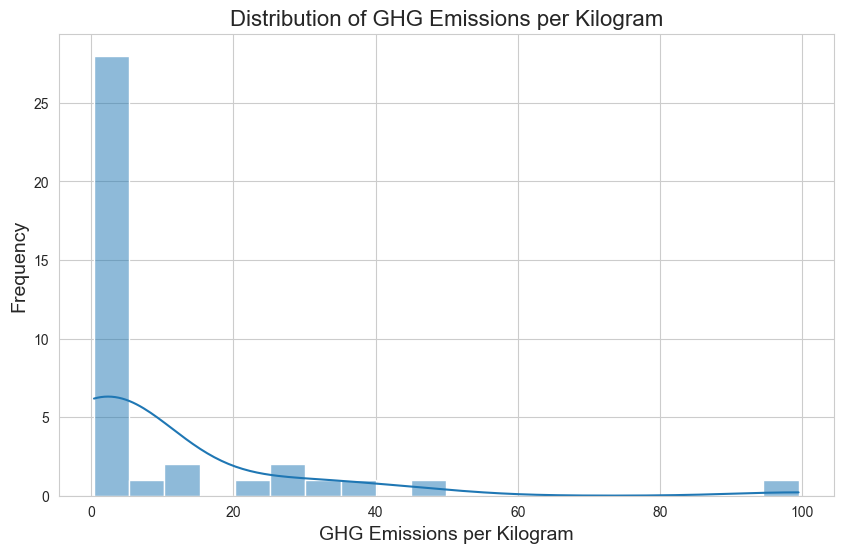

In [40]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ghg, x='Entity', y='GHG emissions per kilogram (Poore & Nemecek, 2018)')
plt.title('GHG Emissions per Kilogram for Different Entities', fontsize=16)
plt.xlabel('Entity', fontsize=14)
plt.ylabel('GHG Emissions per Kilogram', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=ghg, x='GHG emissions per kilogram (Poore & Nemecek, 2018)', kde=True, bins=20)
plt.title('Distribution of GHG Emissions per Kilogram', fontsize=16)
plt.xlabel('GHG Emissions per Kilogram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [41]:
# Melt the dataframe for easier plotting
emissions_melted = pd.melt(emissions, id_vars=['Entity', 'Year'], var_name='Category', value_name='Emissions')

# Create an interactive line plot with hover information
fig = px.line(emissions_melted, x='Category', y='Emissions', color='Entity', line_group='Entity',
              labels={'Entity': 'Entity', 'Emissions': 'Emissions'},
              title='Emissions Over Time for Different Entities',
              template='plotly_dark')

# Customize axis labels and tick angles for better visibility
fig.update_xaxes(title_text='Emission Categories', tickangle=45)
fig.update_yaxes(title_text='Emissions')

# Show the interactive plot
fig.show()


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total emissions for each item
total_emissions = emissions_melted_filtered.groupby('Entity')['Emissions'].sum().reset_index()

# Sort the total emissions in descending order
total_emissions_sorted = total_emissions.sort_values(by='Emissions', ascending=False)

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=total_emissions_sorted, x='Emissions', y='Entity', palette='viridis')

# Set the title and labels
plt.title('Total GHG Emissions for Each Food Item', fontsize=16)
plt.xlabel('Total GHG Emissions (kg)', fontsize=14)
plt.ylabel('Food Item', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'emissions_melted_filtered' is not defined

In [43]:

# Remove the 'Code' category
emissions_melted_filtered = emissions_melted[emissions_melted['Category'] != 'Code']

# Rename the categories
category_mapping = {
    'f.e_land_use': 'Land Use',
    'f.e_farm': 'Farm',
    'f.e_animal_feed': 'Animal Feed',
    'f.e_processing': 'Processing',
    'f.e_transport': 'Transport',
    'f.e_retail': 'Retail',
    'f.e_packaging': 'Packaging',
    'f.e_losses': 'Losses'
}
emissions_melted_filtered['Category'] = emissions_melted_filtered['Category'].map(category_mapping)

# Create the plot
fig = px.bar(emissions_melted_filtered, x='Emissions', y='Entity', color='Category',
             labels={'Emissions': 'GHG Emissions (kg)'},
             title='GHG Emissions per Kilogram of Food Product',
             width=1200, height=800)  # Set the width and height

# Sort entities by total emissions in ascending order
sorted_entities = emissions_melted_filtered.groupby('Entity')['Emissions'].sum().sort_values().index
fig.update_yaxes(categoryorder='array', categoryarray=sorted_entities)

# Customize the layout for better visibility
fig.update_layout(
    xaxis_title='GHG Emissions (kg)',
    yaxis_title='Entity',
    legend_title='Category',
    legend=dict(orientation='h', yanchor='bottom', y=1.01, xanchor='right', x=1),
    barmode='stack',  # Change to 'group' if you want grouped bars instead of stacked
    autosize=False
)

# Show the updated plot
fig.show()


/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_4616/3993796944.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
# Filter entities related to meat and fish
meat_fish_entities = emissions_melted[emissions_melted['Entity'].str.contains('Beef|Pork|Pig|Chicken|Fish|Shrimp')]

# Create the plot
fig = px.bar(meat_fish_entities, x='Emissions', y='Entity', color='Category',
             labels={'Emissions': 'Emissions'},
             title='Emissions by Meat and Fish Entities',
             width=1200, height=800)

# Sort entities by total emissions in ascending order
sorted_entities = meat_fish_entities.groupby('Entity')['Emissions'].sum().sort_values().index
fig.update_yaxes(categoryorder='array', categoryarray=sorted_entities)

# Customize the layout for better visibility
fig.update_layout(
    xaxis_title='Emissions (kg)',
    yaxis_title='Entity',
    legend_title='Category',
    legend=dict(orientation='h', yanchor='bottom', y=1.01, xanchor='right', x=1),
    barmode='stack',  # Change to 'group' if you want grouped bars instead of stacked
    autosize=False
)

# Show the plot
fig.show()


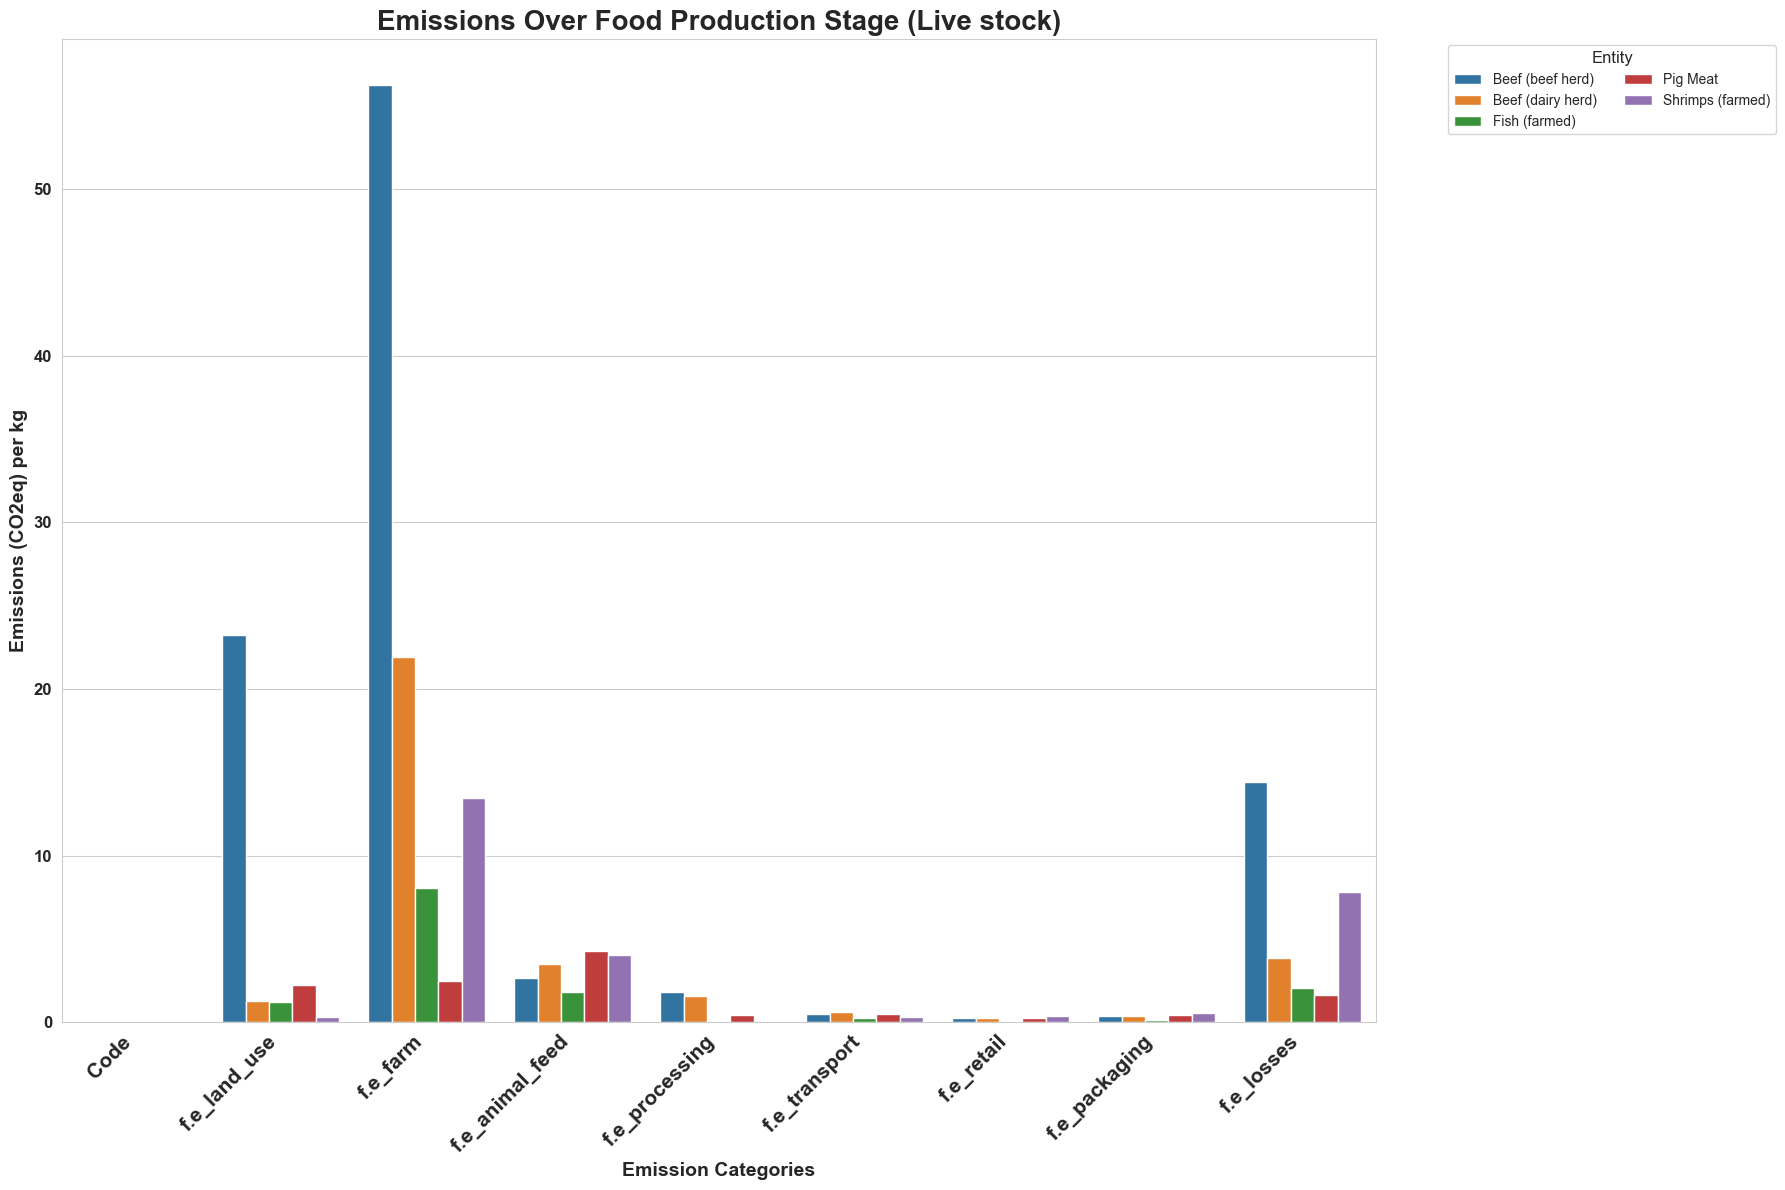

In [45]:
# Filter entities related to meat and fish
meat_fish_entities = emissions_melted[emissions_melted['Entity'].str.contains('Beef|Pork|Pig|Chicken|Fish|Shrimp')]

# Increase the size of the plot
plt.figure(figsize=(18, 12))

# Use a more distinguishable color palette
custom_palette = sns.color_palette("tab10", n_colors=len(meat_fish_entities['Entity'].unique()))

# Bar plot for meat and fish entities
sns.barplot(data=meat_fish_entities, x='Category', y='Emissions', hue='Entity', palette=custom_palette)

plt.title('Emissions Over Food Production Stage (Live stock)', fontsize=20, fontweight='bold')  
plt.xlabel('Emission Categories', fontsize=14, fontweight='bold')  
plt.ylabel('Emissions (CO2eq) per kg', fontsize=14, fontweight='bold')  # Increase y-axis label font weight
plt.legend(title='Entity', title_fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)  # Adjust legend for better visibility and increase title font size
plt.xticks(rotation=45, ha='right', fontsize=15, fontweight='bold')  # Rotate x-axis labels for better visibility and increase font weight
plt.yticks(fontsize=12, fontweight='bold')  # Increase y-axis labels font weight
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


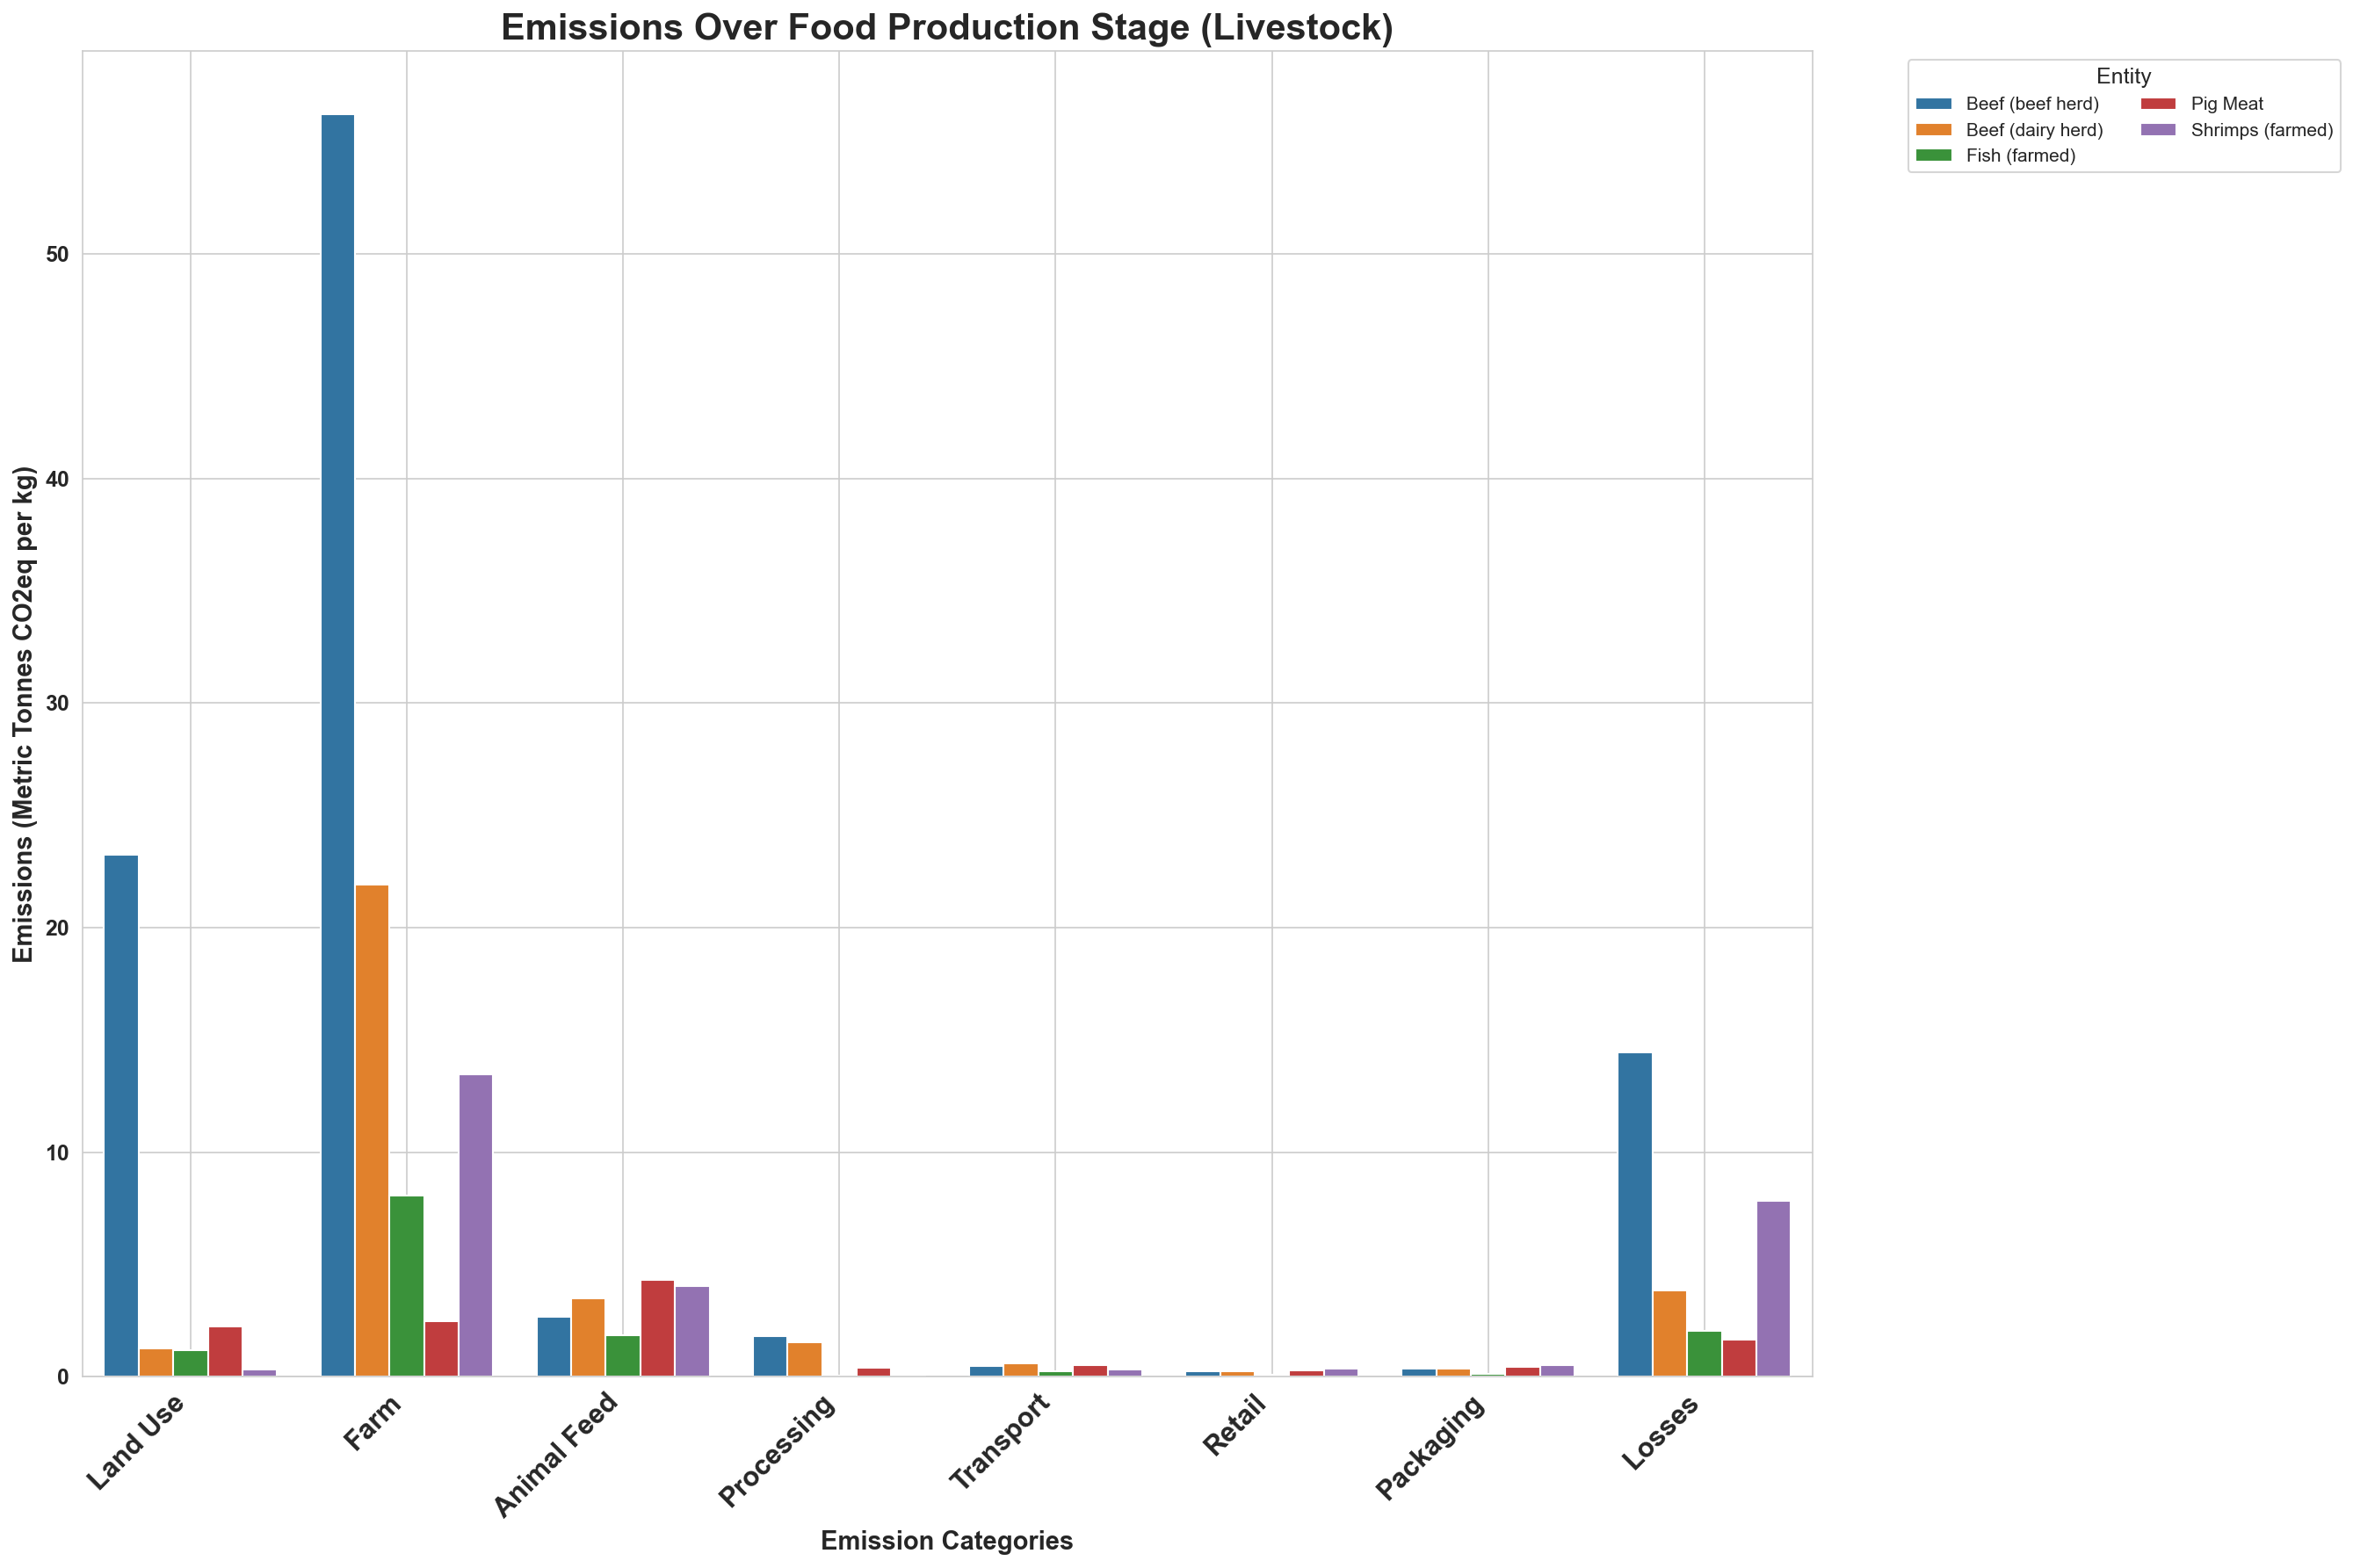

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter entities related to meat and fish
meat_fish_entities = emissions_melted[emissions_melted['Entity'].str.contains('Beef|Pork|Pig|Chicken|Fish|Shrimp')]

# Exclude 'code' from the x-axis categories
meat_fish_entities = meat_fish_entities[meat_fish_entities['Category'] != 'Code']

# Rename the x-axis categories
category_mapping = {
    'f.e_land_use': 'Land Use',
    'f.e_farm': 'Farm',
    'f.e_animal_feed': 'Animal Feed',
    'f.e_processing': 'Processing',
    'f.e_transport': 'Transport',
    'f.e_retail': 'Retail',
    'f.e_packaging': 'Packaging',
    'f.e_losses': 'Losses'
}
meat_fish_entities['Category'] = meat_fish_entities['Category'].map(category_mapping)

# Increase the size and DPI of the plot
plt.figure(figsize=(18, 12), dpi=150)

# Use a more distinguishable color palette
custom_palette = sns.color_palette("tab10", n_colors=len(meat_fish_entities['Entity'].unique()))

# Bar plot for meat and fish entities
sns.barplot(data=meat_fish_entities, x='Category', y='Emissions', hue='Entity', palette=custom_palette)

plt.title('Emissions Over Food Production Stage (Livestock)', fontsize=20, fontweight='bold')  
plt.xlabel('Emission Categories', fontsize=14, fontweight='bold')  
plt.ylabel('Emissions (Metric Tonnes CO2eq per kg)', fontsize=14, fontweight='bold')  # Update y-axis label
plt.legend(title='Entity', title_fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)  # Adjust legend for better visibility and increase title font size
plt.xticks(rotation=45, ha='right', fontsize=15, fontweight='bold')  # Rotate x-axis labels for better visibility and increase font weight
plt.yticks(fontsize=12, fontweight='bold')  # Increase y-axis labels font weight

plt.tight_layout()  # Adjust layout for better spacing
plt.grid(True)  # Add grid lines to the plot
plt.show()


In [47]:
print(emissions_melted.columns)


Index(['Entity', 'Year', 'Category', 'Emissions'], dtype='object')


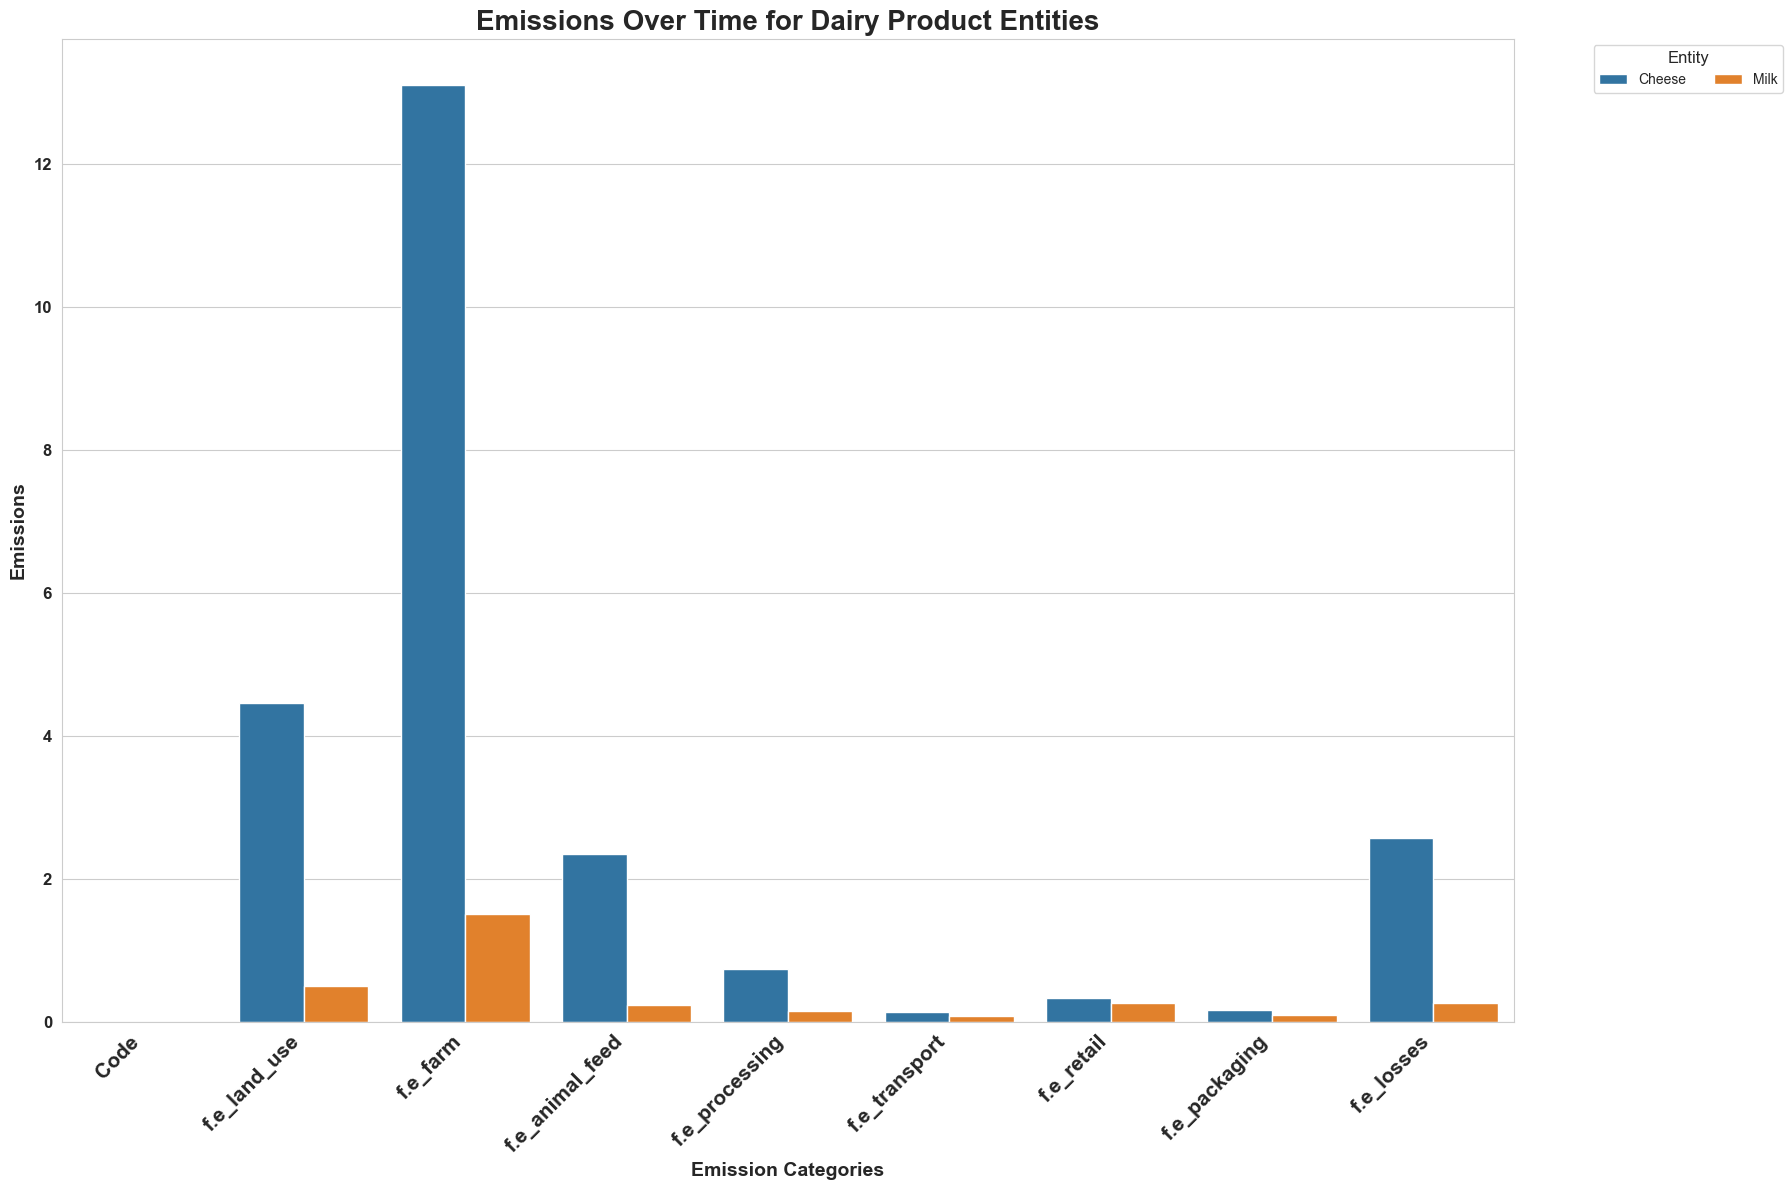

In [48]:
# Filter entities related to dairy products
dairy_entities = emissions_melted[emissions_melted['Entity'].str.contains('Milk|Cheese')]

# Increase the size of the plot
plt.figure(figsize=(18, 12))

# Use a more distinguishable color palette
custom_palette = sns.color_palette("tab10", n_colors=len(dairy_entities['Entity'].unique()))

# Bar plot for dairy product entities
sns.barplot(data=dairy_entities, x='Category', y='Emissions', hue='Entity', palette=custom_palette)

plt.title('Emissions Over Time for Dairy Product Entities', fontsize=20, fontweight='bold')  # Increase title font weight
plt.xlabel('Emission Categories', fontsize=14, fontweight='bold')  # Increase x-axis label font weight
plt.ylabel('Emissions', fontsize=14, fontweight='bold')  # Increase y-axis label font weight
plt.legend(title='Entity', title_fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)  # Adjust legend for better visibility and increase title font size
plt.xticks(rotation=45, ha='right', fontsize=15, fontweight='bold')  # Rotate x-axis labels for better visibility and increase font weight
plt.yticks(fontsize=12, fontweight='bold')  # Increase y-axis labels font weight
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


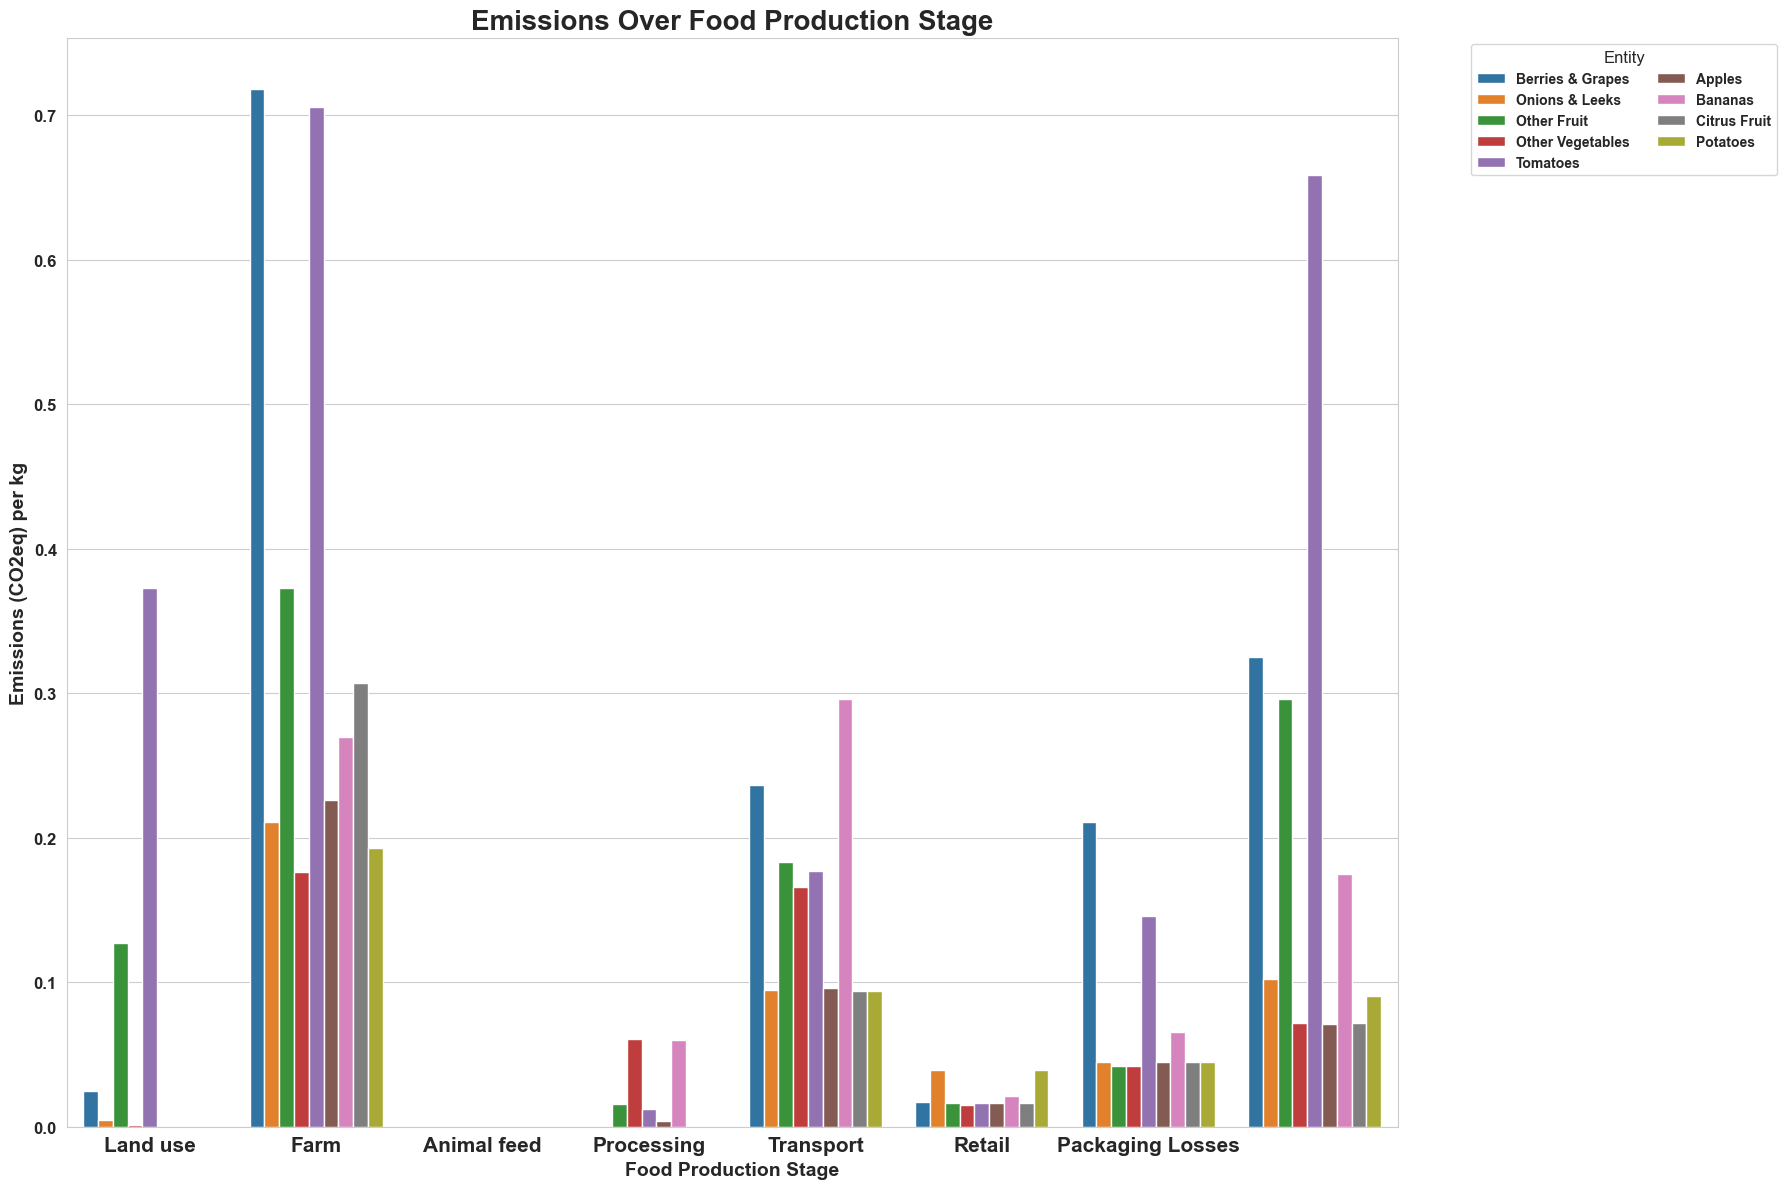

In [49]:
# Filter entities related to vegetables and fruits
veg_fruit_entities = emissions_melted[emissions_melted['Entity'].str.contains('Apples|Bananas|Berries & Grapes|Citrus Fruit|Onions & Leeks|Other Fruit|Other Vegetables|Potatoes|Tomatoes')]

# Remove negative values
veg_fruit_entities = veg_fruit_entities[veg_fruit_entities['Emissions'] >= 0]

# Increase the size of the plot
plt.figure(figsize=(18, 12))

# Use a more distinguishable color palette
custom_palette = sns.color_palette("tab10", n_colors=len(veg_fruit_entities['Entity'].unique()))

# Bar plot for vegetable and fruit entities
sns.barplot(data=veg_fruit_entities, x='Category', y='Emissions', hue='Entity', palette=custom_palette)

plt.title('Emissions Over Food Production Stage', fontsize=20, fontweight='bold')  # Change title
plt.xlabel('Food Production Stage', fontsize=14, fontweight='bold')  # Change x-axis label
plt.ylabel('Emissions (CO2eq) per kg', fontsize=14, fontweight='bold')  # Change y-axis label
plt.legend(title='Entity', title_fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, prop={'weight':'bold'})  # Adjust legend for better visibility and make labels bold
plt.xticks(fontsize=15, fontweight='bold', ticks=range(7), labels=['Land use', 'Farm', 'Animal feed', 'Processing', 'Transport', 'Retail', 'Packaging Losses'])  # Change x-axis labels
plt.yticks(fontsize=12, fontweight='bold')  # Increase y-axis labels font weight
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [50]:
print(ghg.head())

              Entity  Code  Year  \
0             Apples   NaN  2010   
1            Bananas   NaN  2010   
2             Barley   NaN  2010   
3   Beef (beef herd)   NaN  2010   
4  Beef (dairy herd)   NaN  2010   

   GHG emissions per kilogram (Poore & Nemecek, 2018)  
0                                               0.43   
1                                               0.86   
2                                               1.18   
3                                              99.48   
4                                              33.30   


In [51]:
# Check for missing values
missing_values = ghg.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Entity                                                 0
Code                                                  38
Year                                                   0
GHG emissions per kilogram (Poore & Nemecek, 2018)     0
dtype: int64


In [52]:
ghg_cleaned = ghg.drop(columns=['Code'])


/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_4616/171646257.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




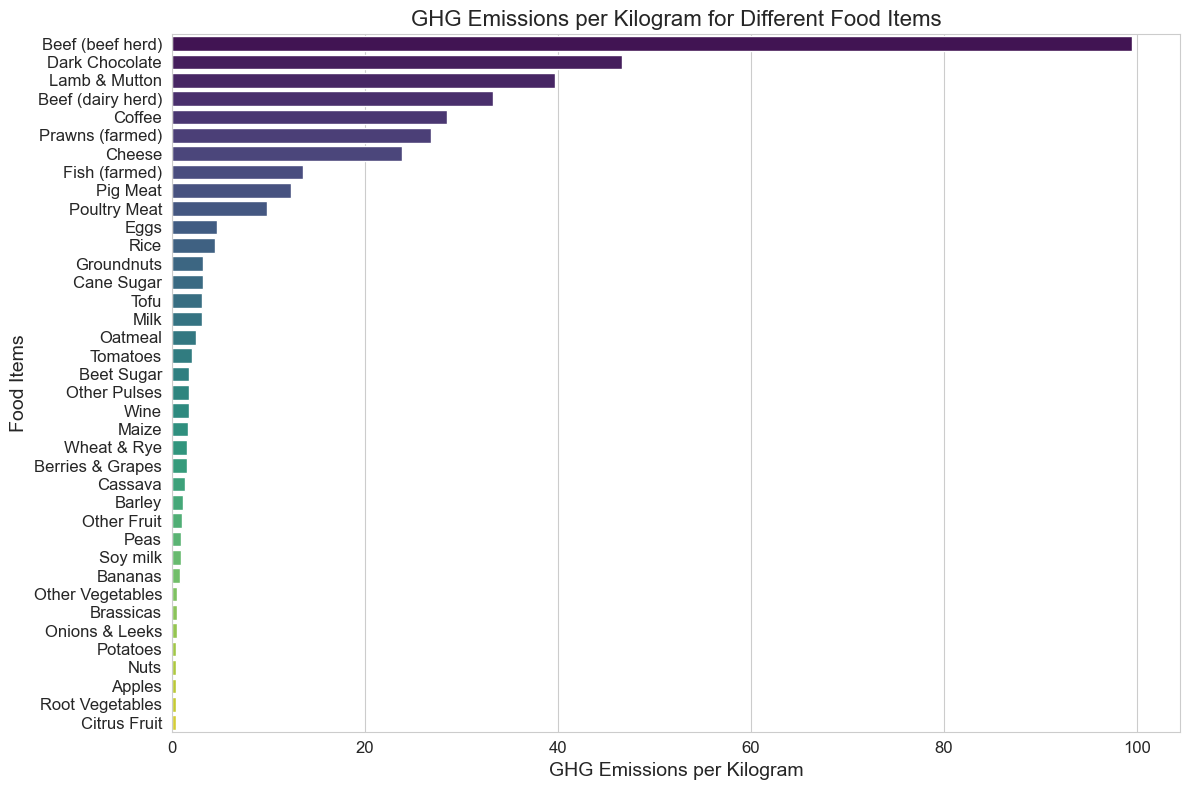

In [53]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Sort the data by GHG emissions per kilogram
ghg_sorted = ghg.sort_values(by='GHG emissions per kilogram (Poore & Nemecek, 2018)', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=ghg_sorted, x='GHG emissions per kilogram (Poore & Nemecek, 2018)', y='Entity', palette='viridis')

# Set the title and labels
plt.title('GHG Emissions per Kilogram for Different Food Items', fontsize=16)
plt.xlabel('GHG Emissions per Kilogram', fontsize=14)
plt.ylabel('Food Items', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_4616/3677822791.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




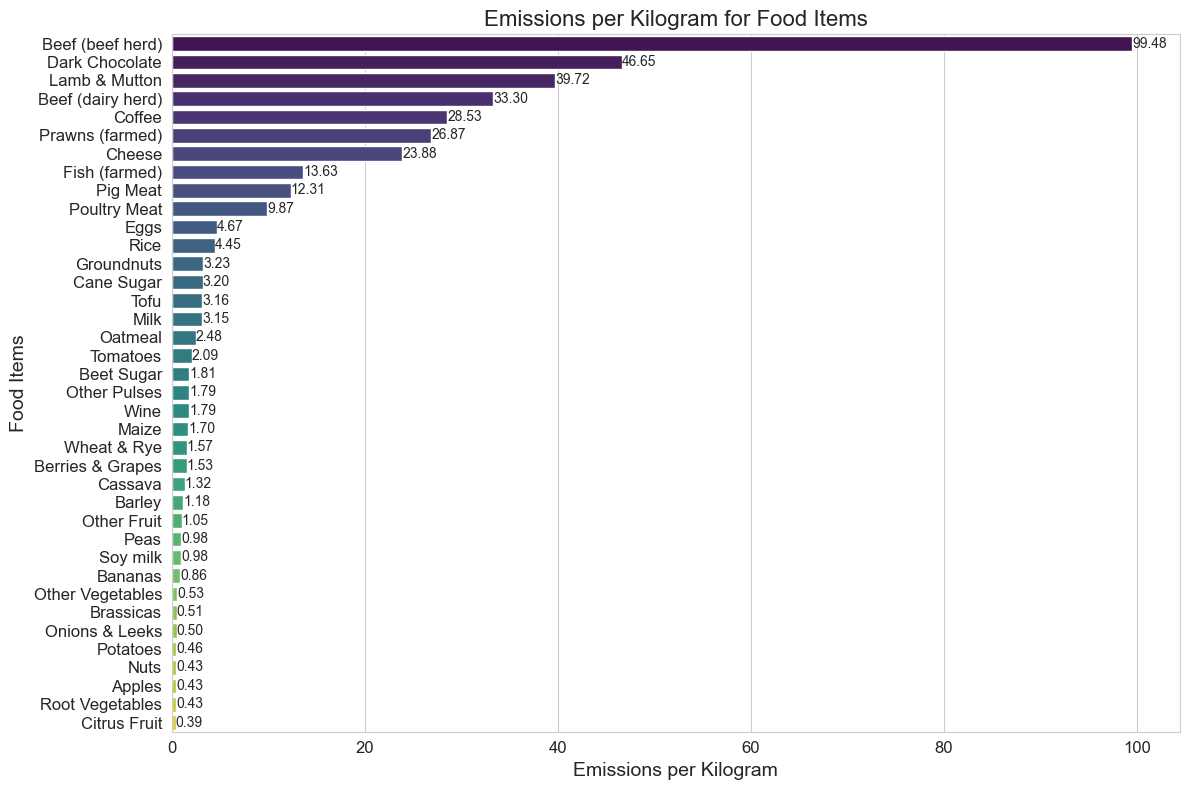

In [54]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Sort the data by GHG emissions per kilogram
ghg_sorted = ghg.sort_values(by='GHG emissions per kilogram (Poore & Nemecek, 2018)', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=ghg_sorted, x='GHG emissions per kilogram (Poore & Nemecek, 2018)', y='Entity', palette='viridis')

# Annotate bars with the total emissions values
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
            f'{ghg_sorted.iloc[i]["GHG emissions per kilogram (Poore & Nemecek, 2018)"]:.2f}',
            va='center', ha='left', fontsize=10)

# Set the title and labels
plt.title('Emissions per Kilogram for Food Items', fontsize=16)
plt.xlabel('Emissions per Kilogram', fontsize=14)
plt.ylabel('Food Items', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


This bar plot will provide us with insights into which food items have the highest GHG emissions per kilogram

/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_4616/1482071723.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




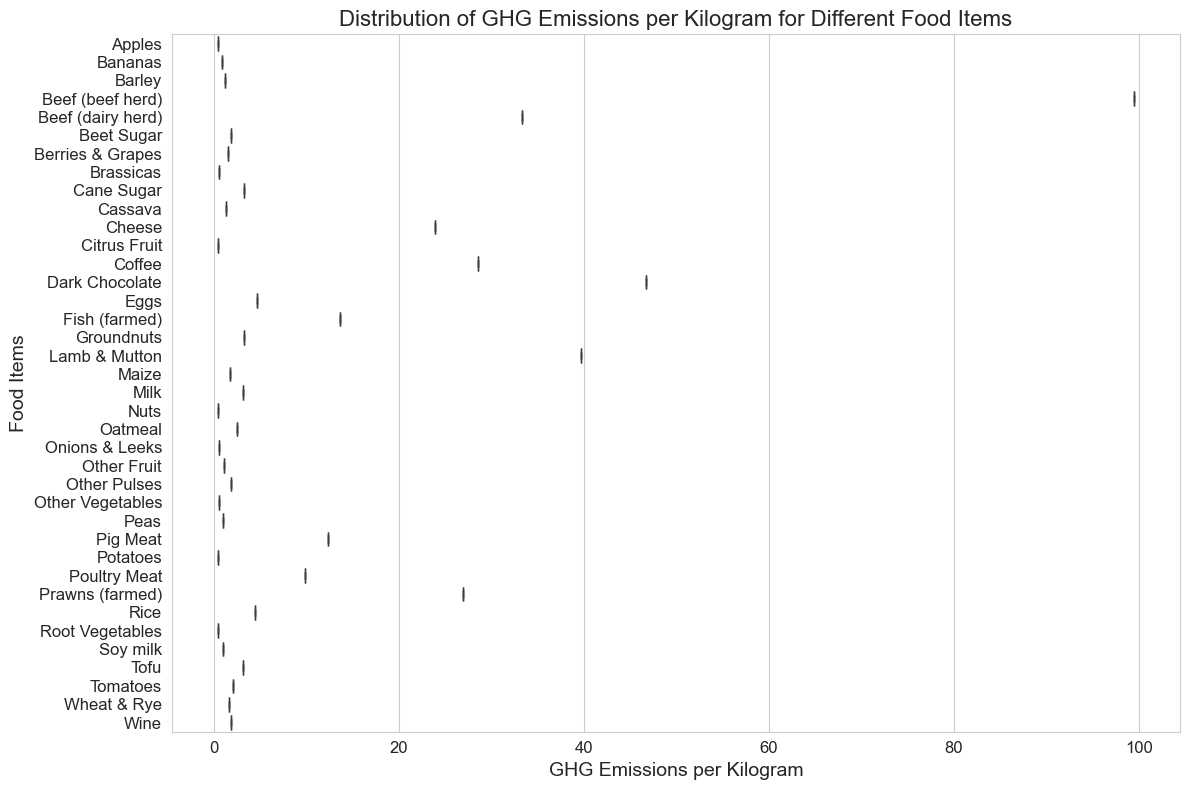

In [55]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=ghg, x='GHG emissions per kilogram (Poore & Nemecek, 2018)', y='Entity', palette='muted')

# Set the title and labels
plt.title('Distribution of GHG Emissions per Kilogram for Different Food Items', fontsize=16)
plt.xlabel('GHG Emissions per Kilogram', fontsize=14)
plt.ylabel('Food Items', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


This box plot will help us visualize the spread of GHG emissions per kilogram for each food item.

In [56]:
# Print the columns of the ghg DataFrame
print(ghg.columns)


Index(['Entity', 'Code', 'Year',
       'GHG emissions per kilogram (Poore & Nemecek, 2018)'],
      dtype='object')


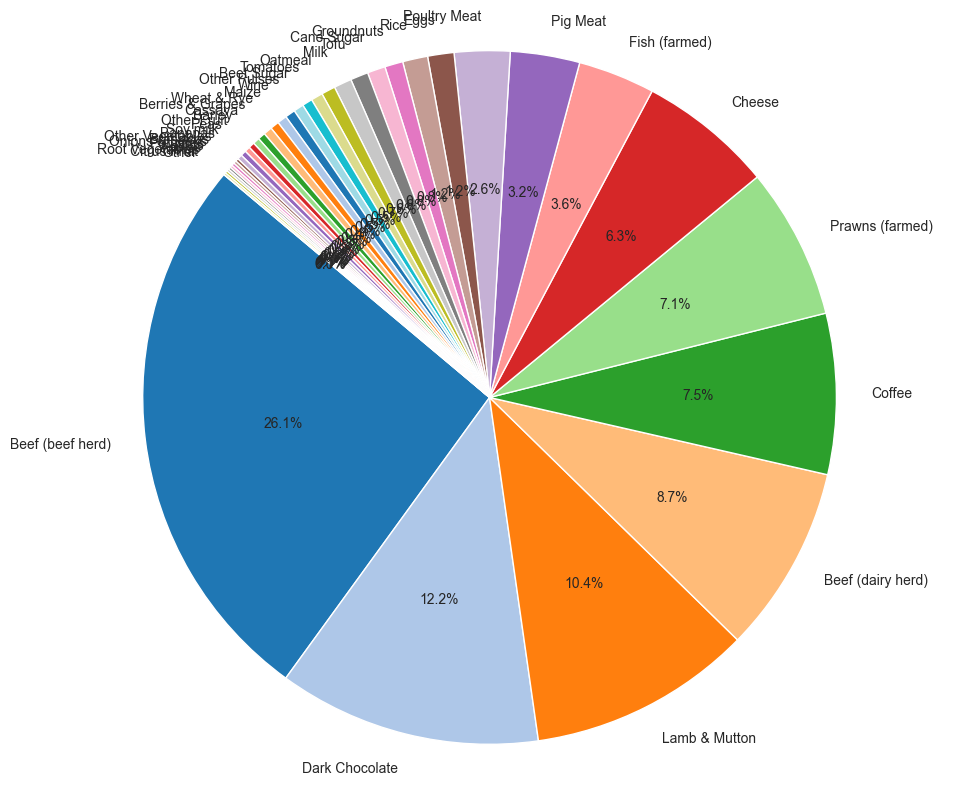

In [57]:
# Sort the DataFrame by the 'GHG emissions per kilogram (Poore & Nemecek, 2018)' column in descending order
ghg_sorted = ghg.sort_values(by='GHG emissions per kilogram (Poore & Nemecek, 2018)', ascending=False)

# Find the sum of emissions for categories with emissions below 3.0%
emissions_below_3 = ghg_sorted[ghg_sorted['GHG emissions per kilogram (Poore & Nemecek, 2018)'] < 0.03]['GHG emissions per kilogram (Poore & Nemecek, 2018)'].sum()

# Create a DataFrame with entities below 3.0%
below_3_df = ghg_sorted[ghg_sorted['GHG emissions per kilogram (Poore & Nemecek, 2018)'] < 0.03]

# Combine all entities below 3.0% into a single row named 'Other'
other_row = pd.DataFrame({'Entity': ['Other'], 'GHG emissions per kilogram (Poore & Nemecek, 2018)': [emissions_below_3]})

# Drop rows with emissions below 3.0%
above_3_df = ghg_sorted[ghg_sorted['GHG emissions per kilogram (Poore & Nemecek, 2018)'] >= 0.03]

# Concatenate 'Other' row with above_3_df
new_df = pd.concat([above_3_df, other_row])

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(new_df['GHG emissions per kilogram (Poore & Nemecek, 2018)'], labels=new_df['Entity'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


This pie chart will give us a visual representation of how much each food category contributes to the total GHG emissions.

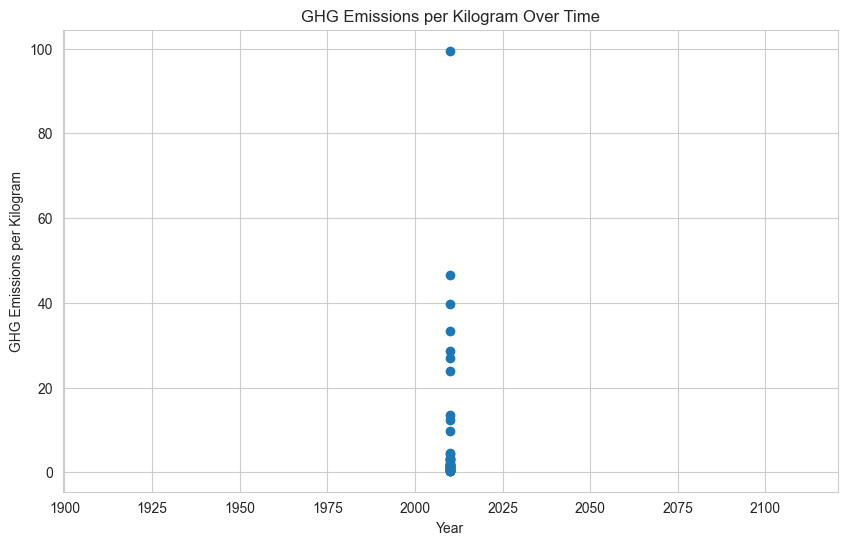

In [58]:
# Scatter plot for GHG emissions per kilogram against the year
plt.figure(figsize=(10, 6))
plt.scatter(ghg['Year'], ghg['GHG emissions per kilogram (Poore & Nemecek, 2018)'])
plt.xlabel('Year')
plt.ylabel('GHG Emissions per Kilogram')
plt.title('GHG Emissions per Kilogram Over Time')
plt.grid(True)
plt.show()


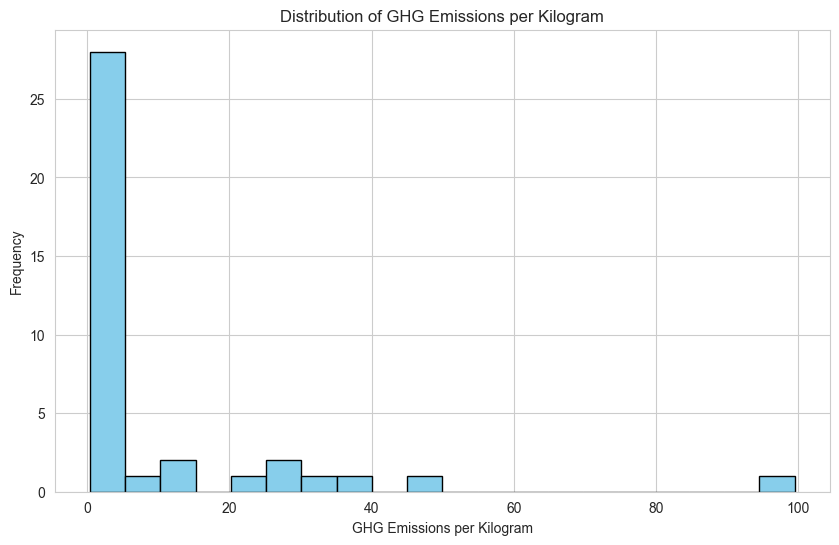

In [59]:
# Histogram for GHG emissions per kilogram
plt.figure(figsize=(10, 6))
plt.hist(ghg['GHG emissions per kilogram (Poore & Nemecek, 2018)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('GHG Emissions per Kilogram')
plt.ylabel('Frequency')
plt.title('Distribution of GHG Emissions per Kilogram')
plt.grid(True)
plt.show()



This code will generate a histogram showing the distribution of GHG emissions per kilogram across different food items

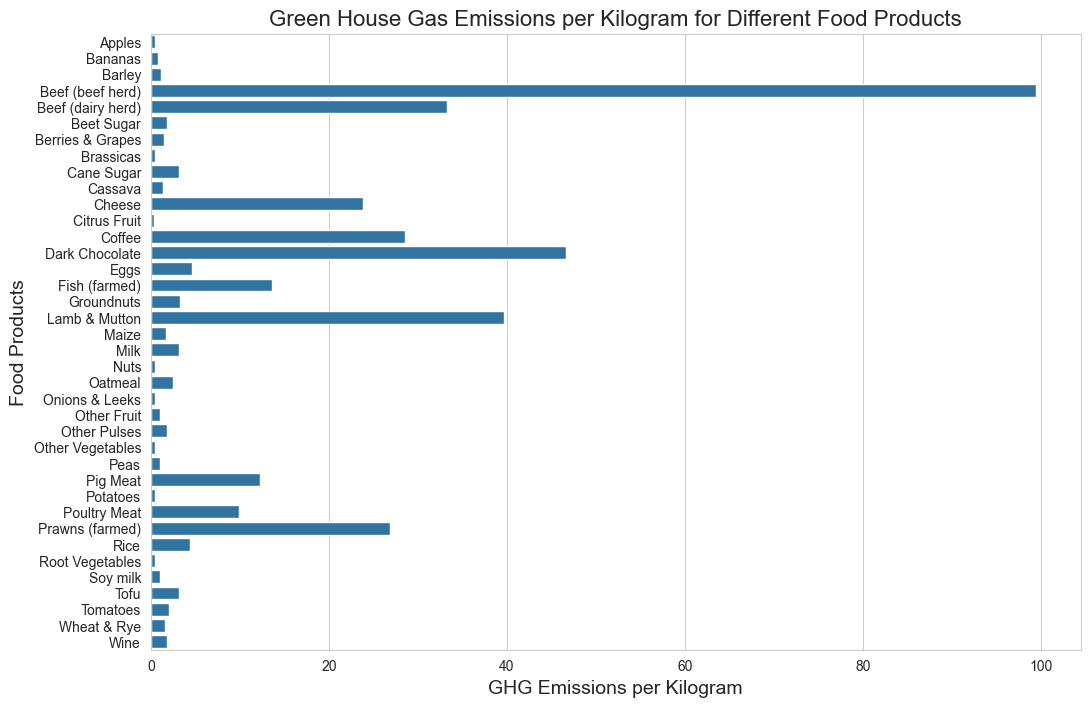

In [60]:

# Set the style of seaborn
sns.set_style('whitegrid')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=ghg, x='GHG emissions per kilogram (Poore & Nemecek, 2018)', y='Entity')
plt.title('Green House Gas Emissions per Kilogram for Different Food Products', fontsize=16)
plt.xlabel('GHG Emissions per Kilogram', fontsize=14)
plt.ylabel('Food Products', fontsize=14)
plt.show()


## Merge emissions & GHG dataset


In [61]:

# Merge the datasets on the 'Entity' column
combined_df = pd.merge(emissions, ghg, on='Entity', how='inner')

# Now combined_df contains the merged dataset with information from both emissions and GHG datasets


In [62]:
# Sum up the emissions from different sources and store the result in a new column
combined_df['total_food_emission'] = combined_df[['f.e_land_use', 'f.e_farm', 'f.e_animal_feed', 
                                                  'f.e_processing', 'f.e_transport', 'f.e_retail', 
                                                  'f.e_packaging', 'f.e_losses']].sum(axis=1)


In [63]:
combined_df.head()

Entity  Code_x  Year_x  f.e_land_use   f.e_farm  \
0             Apples     NaN    2018     -0.028951   0.225816   
1            Bananas     NaN    2018     -0.025534   0.269618   
2             Barley     NaN    2018      0.008676   0.176377   
3   Beef (beef herd)     NaN    2018     23.237536  56.228063   
4  Beef (dairy herd)     NaN    2018      1.266022  21.915529   

   f.e_animal_feed  f.e_processing  f.e_transport  f.e_retail  f.e_packaging  \
0         0.000000        0.003820       0.095804    0.016578       0.044526   
1         0.000000        0.060146       0.295830    0.020981       0.065670   
2         0.000000        0.127703       0.035351    0.263587       0.496786   
3         2.680979        1.811083       0.494125    0.233538       0.352084   
4         3.503673        1.547664       0.592410    0.254032       0.374549   

   f.e_losses  Code_y  Year_y  \
0    0.070808     NaN    2010   
1    0.175185     NaN    2010   
2    0.070692     NaN    2010   
3   14.439998     NaN    2010   
4    3.847515     NaN    2010   

   GHG emissions per kilogram (Poore & Nemecek, 2018)  total_food_emission  
0                                               0.43              0.428401  
1                                               0.86              0.861896  
2                                               1.18              1.179171  
3                                              99.48             99.477405  
4                                              33.30             33.301395

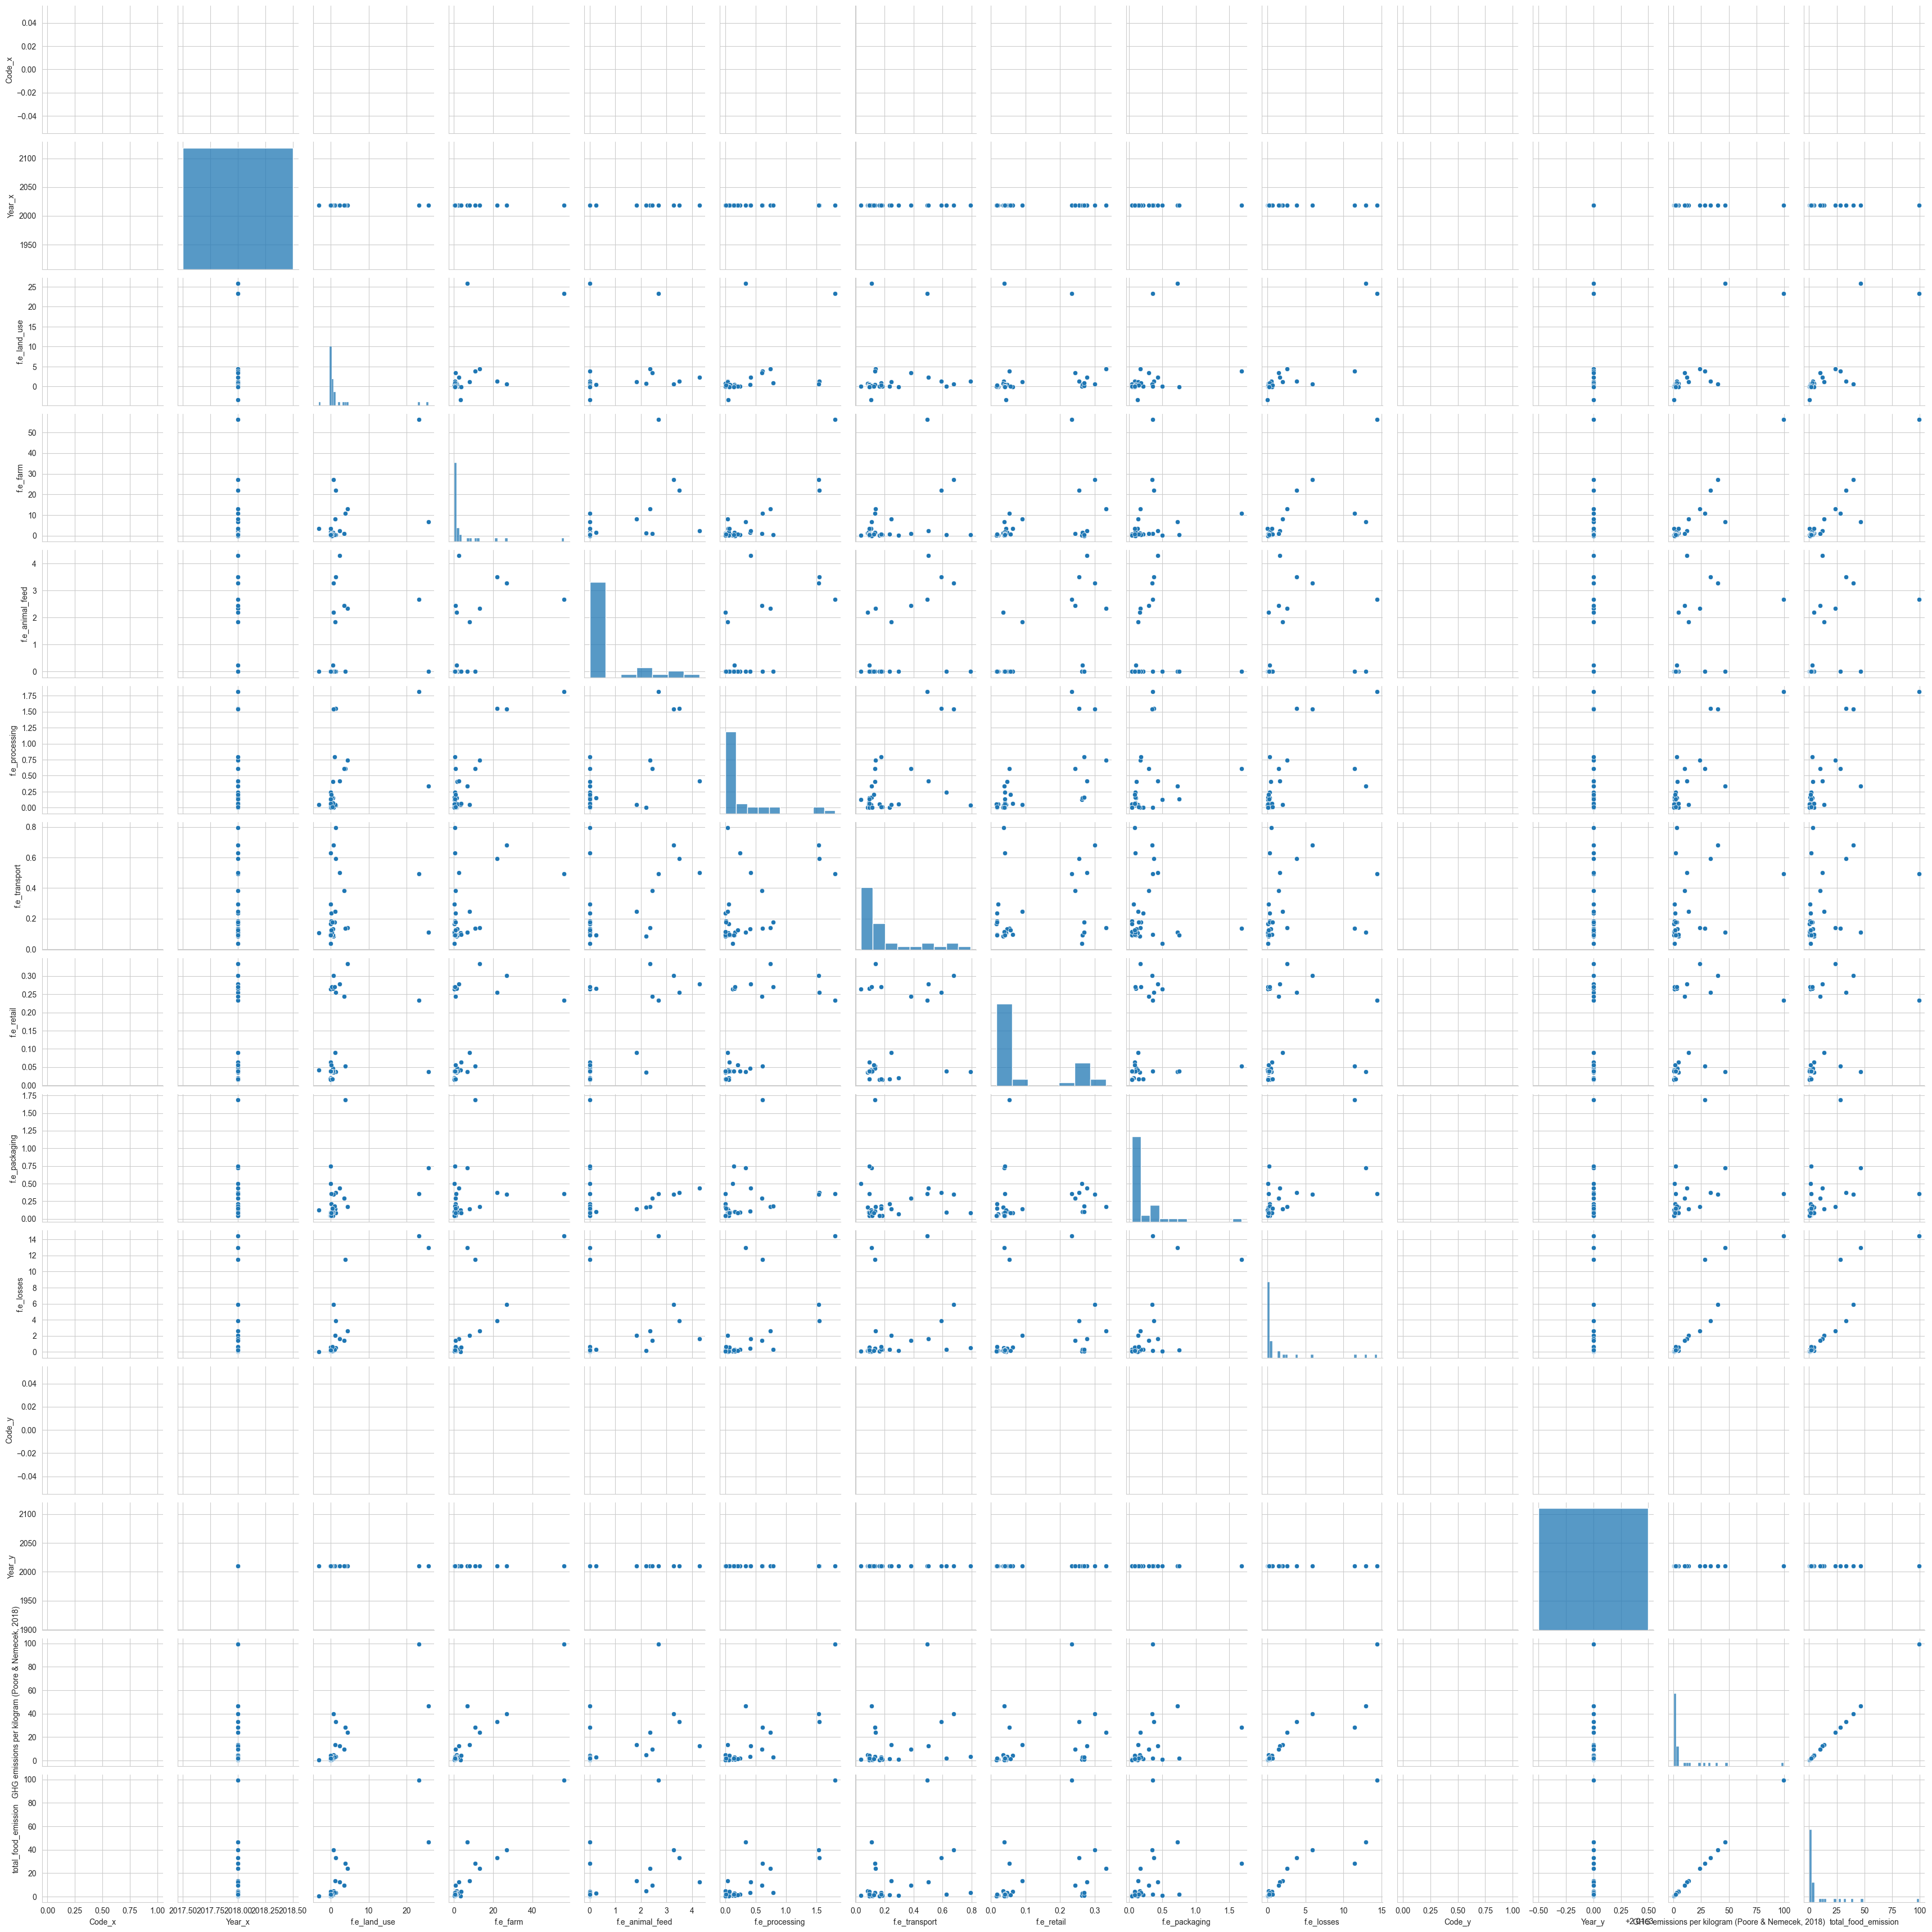

In [64]:
# Creating pair plot
sns.pairplot(combined_df)


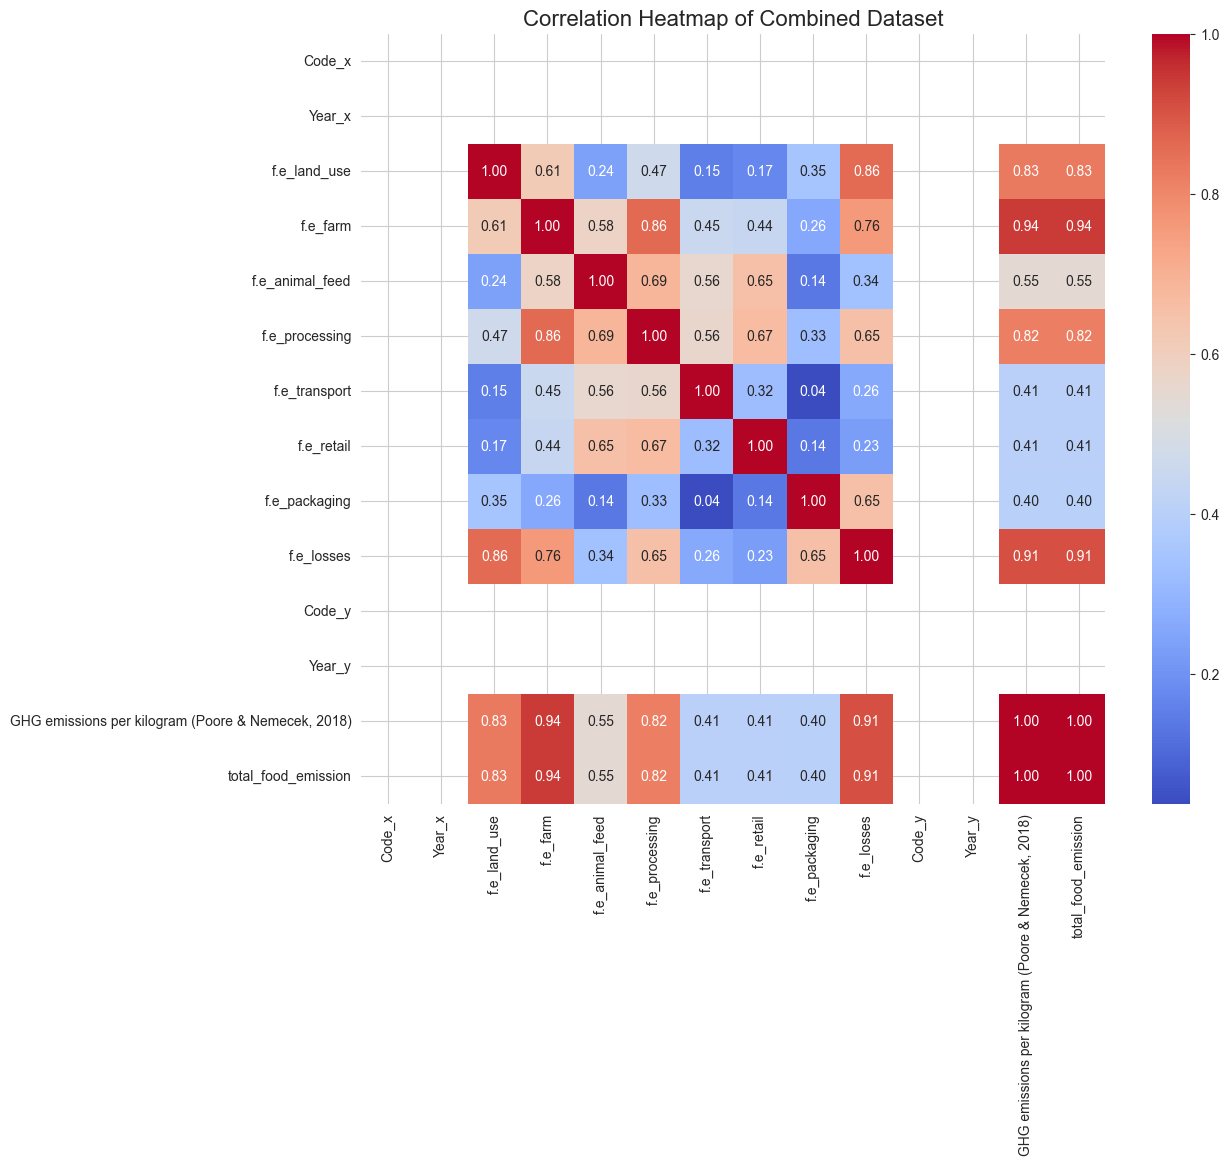

In [65]:
# Select only numeric columns
numeric_cols = combined_df.select_dtypes(include='number')

# Creating correlation matrix
corr_matrix = numeric_cols.corr()

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Combined Dataset', fontsize=16)
plt.show()


In [66]:
combined_df.columns

Index(['Entity', 'Code_x', 'Year_x', 'f.e_land_use', 'f.e_farm',
       'f.e_animal_feed', 'f.e_processing', 'f.e_transport', 'f.e_retail',
       'f.e_packaging', 'f.e_losses', 'Code_y', 'Year_y',
       'GHG emissions per kilogram (Poore & Nemecek, 2018)',
       'total_food_emission'],
      dtype='object')

In [67]:
# Group the combined dataset by entity and calculate total emissions and GHG emissions
entity_totals = combined_df.groupby('Entity')['GHG emissions per kilogram (Poore & Nemecek, 2018)'].sum().reset_index()

# Display the first few rows of the grouped dataset
print(entity_totals.head())


              Entity  GHG emissions per kilogram (Poore & Nemecek, 2018)
0             Apples                                               0.43 
1            Bananas                                               0.86 
2             Barley                                               1.18 
3   Beef (beef herd)                                              99.48 
4  Beef (dairy herd)                                              33.30 


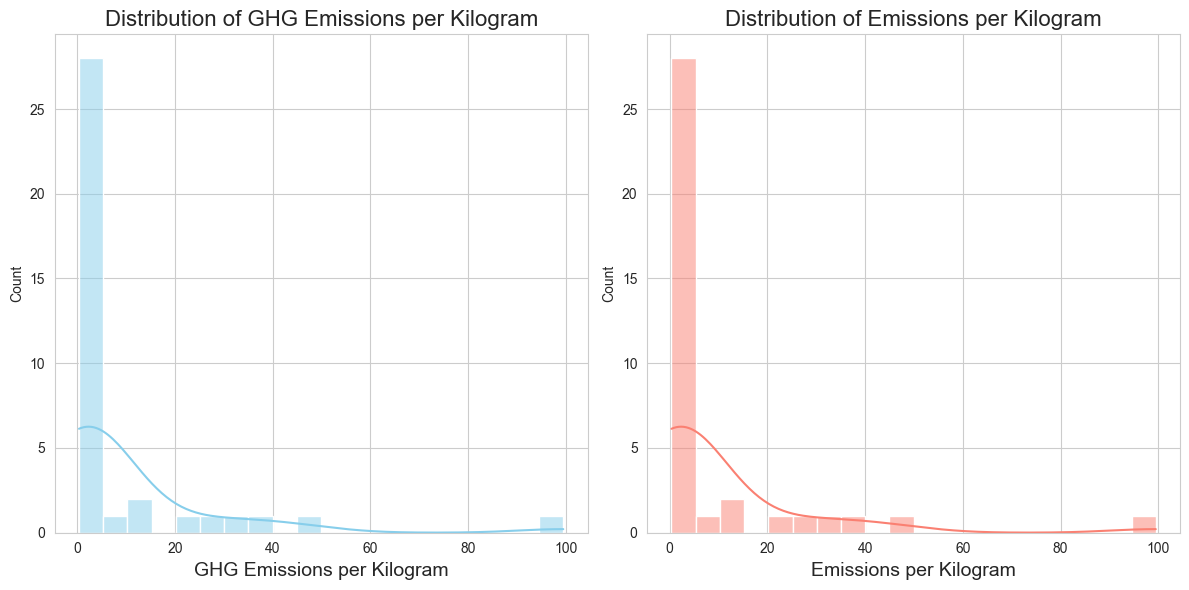

In [70]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Create subplots for side-by-side histograms
plt.figure(figsize=(12, 6))

# Create histogram for GHG emissions
plt.subplot(1, 2, 1)
sns.histplot(data=combined_df, x='GHG emissions per kilogram (Poore & Nemecek, 2018)', kde=True, bins=20, color='skyblue')
plt.title('Distribution of GHG Emissions per Kilogram', fontsize=16)
plt.xlabel('GHG Emissions per Kilogram', fontsize=14)

# Create histogram for emissions
plt.subplot(1, 2, 2)
sns.histplot(data=combined_df, x='total_food_emission', kde=True, bins=20, color='salmon')
plt.title('Distribution of Emissions per Kilogram', fontsize=16)
plt.xlabel('Emissions per Kilogram', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [71]:
# Display the first few rows of the dataset
print(emissions.head())


              Entity  Code  Year  f.e_land_use   f.e_farm  f.e_animal_feed  \
0             Apples   NaN  2018     -0.028951   0.225816         0.000000   
1            Bananas   NaN  2018     -0.025534   0.269618         0.000000   
2             Barley   NaN  2018      0.008676   0.176377         0.000000   
3   Beef (beef herd)   NaN  2018     23.237536  56.228063         2.680979   
4  Beef (dairy herd)   NaN  2018      1.266022  21.915529         3.503673   

   f.e_processing  f.e_transport  f.e_retail  f.e_packaging  f.e_losses  
0        0.003820       0.095804    0.016578       0.044526    0.070808  
1        0.060146       0.295830    0.020981       0.065670    0.175185  
2        0.127703       0.035351    0.263587       0.496786    0.070692  
3        1.811083       0.494125    0.233538       0.352084   14.439998  
4        1.547664       0.592410    0.254032       0.374549    3.847515  


In [72]:
# Check data types
print(emissions.dtypes)

# Check unique values in the 'Year' column
print(emissions['Year'].unique())


Entity              object
Code               float64
Year                 int64
f.e_land_use       float64
f.e_farm           float64
f.e_animal_feed    float64
f.e_processing     float64
f.e_transport      float64
f.e_retail         float64
f.e_packaging      float64
f.e_losses         float64
dtype: object
[2018]


In [73]:

# Group data by 'Entity' and check the counts
entity_counts = emissions['Entity'].value_counts()
print(entity_counts)


Entity
Apples               1
Rapeseed Oil         1
Other Fruit          1
Other Pulses         1
Other Vegetables     1
Palm Oil             1
Peas                 1
Pig Meat             1
Potatoes             1
Poultry Meat         1
Rice                 1
Olive Oil            1
Root Vegetables      1
Shrimps (farmed)     1
Soy milk             1
Soybean Oil          1
Sunflower Oil        1
Tofu                 1
Tomatoes             1
Wheat & Rye          1
Onions & Leeks       1
Oatmeal              1
Bananas              1
Cheese               1
Barley               1
Beef (beef herd)     1
Beef (dairy herd)    1
Beet Sugar           1
Berries & Grapes     1
Brassicas            1
Cane Sugar           1
Cassava              1
Citrus Fruit         1
Nuts                 1
Coffee               1
Dark Chocolate       1
Eggs                 1
Fish (farmed)        1
Groundnuts           1
Lamb & Mutton        1
Maize                1
Milk                 1
Wine                 1
Name

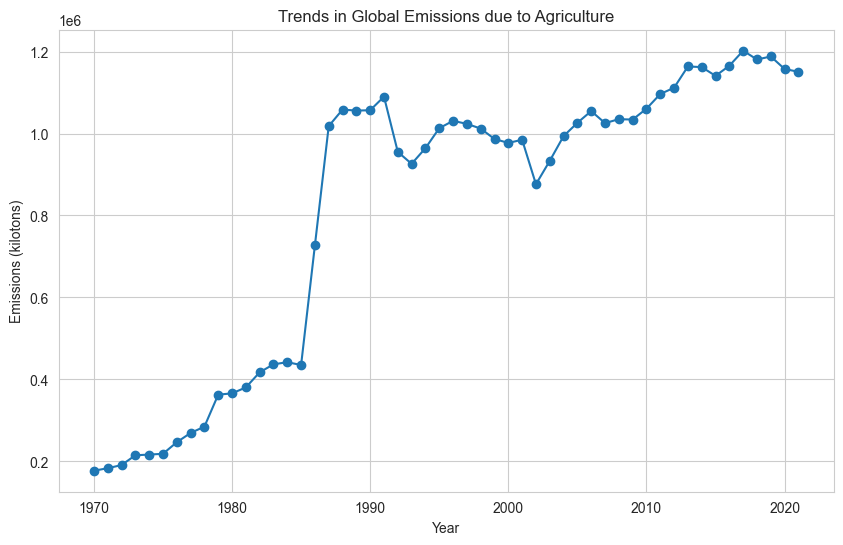

In [76]:
# Filter the data for emissions related to agriculture
agriculture_emissions = agricultur[agricultur["Domain"] == "Emissions from Energy use in agriculture"]

# Aggregate the emissions data by year
global_emissions = agriculture_emissions.groupby("Year")["Value"].sum()

# Plot the global emissions over time
plt.figure(figsize=(10, 6))
plt.plot(global_emissions.index, global_emissions.values, marker='o', linestyle='-')
plt.title("Trends in Global Emissions due to Agriculture")
plt.xlabel("Year")
plt.ylabel("Emissions (kilotons)")
plt.grid(True)
plt.show()


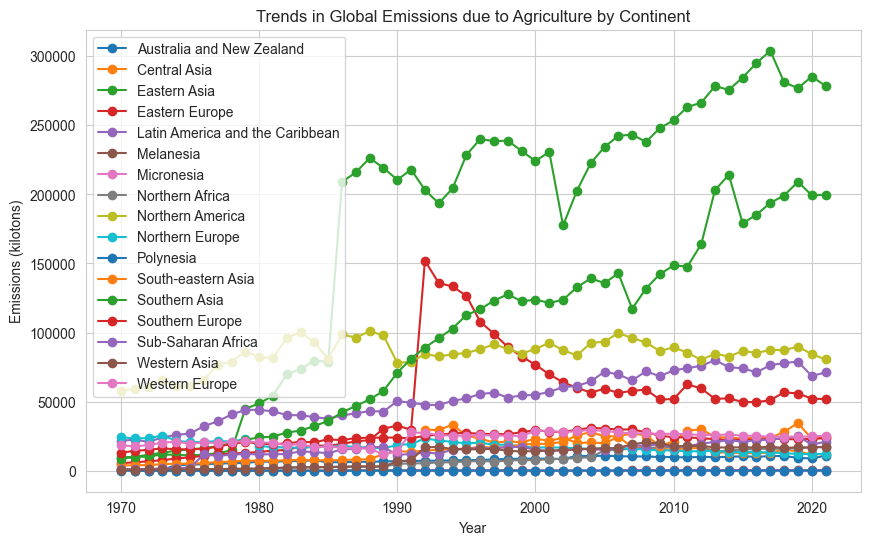

In [77]:
# Filter the data for emissions related to agriculture
agriculture_emissions = agricultur[agricultur["Domain"] == "Emissions from Energy use in agriculture"]

# Merge with countries dataset to get continent information
agriculture_emissions = pd.merge(agriculture_emissions, countries[['name', 'sub-region']], left_on='Area', right_on='name', how='left')

# Rename the 'sub-region' column to 'Continent'
agriculture_emissions.rename(columns={'sub-region': 'Continent'}, inplace=True)

# Aggregate the emissions data by continent and year
continent_emissions = agriculture_emissions.groupby(['Continent', 'Year'])['Value'].sum().reset_index()

# Plot the emissions trends for each continent
plt.figure(figsize=(10, 6))
for continent in continent_emissions['Continent'].unique():
    data = continent_emissions[continent_emissions['Continent'] == continent]
    plt.plot(data['Year'], data['Value'], marker='o', linestyle='-', label=continent)

plt.title("Trends in Global Emissions due to Agriculture by Continent")
plt.xlabel("Year")
plt.ylabel("Emissions (kilotons)")
plt.legend()
plt.grid(True)
plt.show()


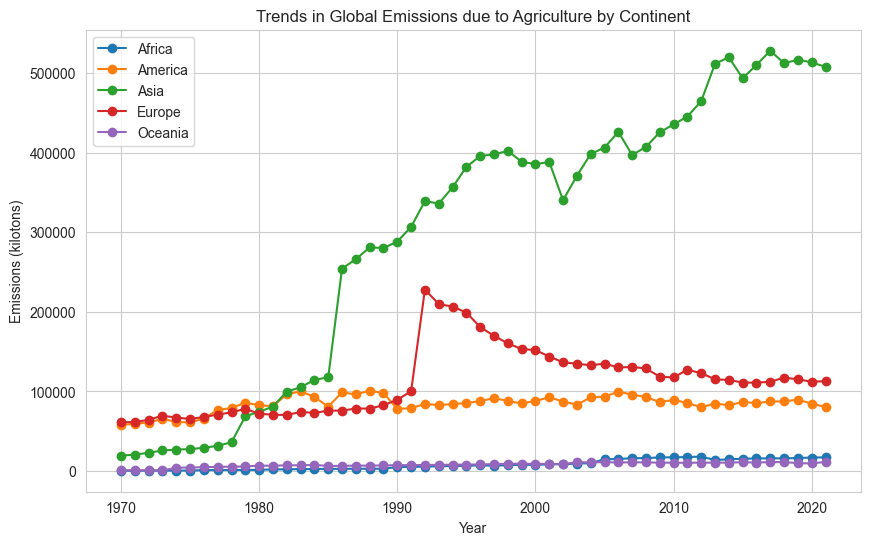

In [78]:
# Filter the data for emissions related to agriculture
agriculture_emissions = agricultur[agricultur["Domain"] == "Emissions from Energy use in agriculture"]

# Merge with countries dataset to get continent information
agriculture_emissions = pd.merge(agriculture_emissions, countries[['name', 'sub-region']], left_on='Area', right_on='name', how='left')

# Create a dictionary to map sub-regions to broader continent groups
continent_mapping = {
    'Southern Asia': 'Asia',
    'Eastern Asia': 'Asia',
    'South-Eastern Asia': 'Asia',
    'Western Asia': 'Asia',
    'Central Asia': 'Asia',
    'Northern Europe': 'Europe',
    'Western Europe': 'Europe',
    'Eastern Europe': 'Europe',
    'Southern Europe': 'Europe',
    'Northern Africa': 'Africa',
    'Western Africa': 'Africa',
    'Eastern Africa': 'Africa',
    'Middle Africa': 'Africa',
    'Southern Africa': 'Africa',
    'Northern America': 'America',
    'Central America': 'America',
    'Caribbean': 'America',
    'South America': 'America',
    'Australia and New Zealand': 'Oceania',
    'Melanesia': 'Oceania',
    'Micronesia': 'Oceania',
    'Polynesia': 'Oceania'
}

# Map sub-regions to continent groups
agriculture_emissions['Continent'] = agriculture_emissions['sub-region'].map(continent_mapping)

# Aggregate the emissions data by continent and year
continent_emissions = agriculture_emissions.groupby(['Continent', 'Year'])['Value'].sum().reset_index()

# Plot the emissions trends for each continent
plt.figure(figsize=(10, 6))
for continent in continent_emissions['Continent'].unique():
    data = continent_emissions[continent_emissions['Continent'] == continent]
    plt.plot(data['Year'], data['Value'], marker='o', linestyle='-', label=continent)

plt.title("Trends in Global Emissions due to Agriculture by Continent")
plt.xlabel("Year")
plt.ylabel("Emissions (kilotons)")
plt.legend()
plt.grid(True)
plt.show()


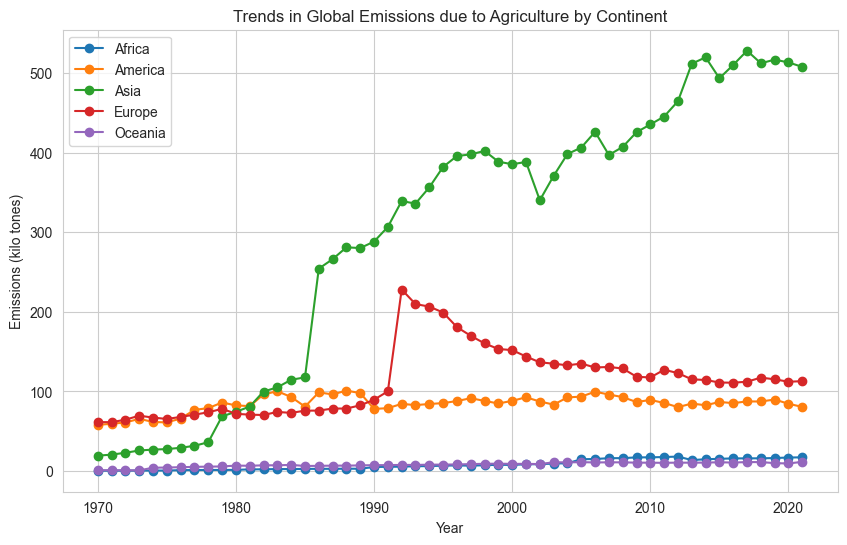

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for emissions related to agriculture
agriculture_emissions = agricultur[agricultur["Domain"] == "Emissions from Energy use in agriculture"]

# Merge with countries dataset to get continent information
agriculture_emissions = pd.merge(agriculture_emissions, countries[['name', 'sub-region']], left_on='Area', right_on='name', how='left')

# Create a dictionary to map sub-regions to broader continent groups
continent_mapping = {
    'Southern Asia': 'Asia',
    'Eastern Asia': 'Asia',
    'South-Eastern Asia': 'Asia',
    'Western Asia': 'Asia',
    'Central Asia': 'Asia',
    'Northern Europe': 'Europe',
    'Western Europe': 'Europe',
    'Eastern Europe': 'Europe',
    'Southern Europe': 'Europe',
    'Northern Africa': 'Africa',
    'Western Africa': 'Africa',
    'Eastern Africa': 'Africa',
    'Middle Africa': 'Africa',
    'Southern Africa': 'Africa',
    'Northern America': 'America',
    'Central America': 'America',
    'Caribbean': 'America',
    'South America': 'America',
    'Australia and New Zealand': 'Oceania',
    'Melanesia': 'Oceania',
    'Micronesia': 'Oceania',
    'Polynesia': 'Oceania'
}

# Map sub-regions to continent groups
agriculture_emissions['Continent'] = agriculture_emissions['sub-region'].map(continent_mapping)

# Aggregate the emissions data by continent and year
continent_emissions = agriculture_emissions.groupby(['Continent', 'Year'])['Value'].sum().reset_index()

# Plot the emissions trends for each continent
plt.figure(figsize=(10, 6))
for continent in continent_emissions['Continent'].unique():
    data = continent_emissions[continent_emissions['Continent'] == continent]
    plt.plot(data['Year'], data['Value'] / 1000, marker='o', linestyle='-', label=continent)  # Convert to tones

plt.title("Trends in Global Emissions due to Agriculture by Continent")
plt.xlabel("Year")
plt.ylabel("Emissions (kilo tones)")  # Update y-axis label
plt.legend()
plt.grid(True)
plt.show()


In [80]:
# Merge CO2 emissions dataset with countries dataset based on country names
co2_countries = pd.merge(co2, countries[['name', 'region']], left_on='country', right_on='name', how='left')

# Group by year and continent, summing up CO2 emissions
co2_per_year_continent = co2_countries.groupby(['year', 'region'])['co2'].sum().reset_index()

# Display the resulting DataFrame
print(co2_per_year_continent)


      year    region        co2
0     1750    Africa      0.000
1     1750  Americas      0.000
2     1750      Asia      0.000
3     1750    Europe      0.000
4     1750   Oceania      0.000
...    ...       ...        ...
1360  2022    Africa   1385.134
1361  2022  Americas   2207.367
1362  2022      Asia  19749.614
1363  2022    Europe   3114.006
1364  2022   Oceania    440.925

[1365 rows x 3 columns]


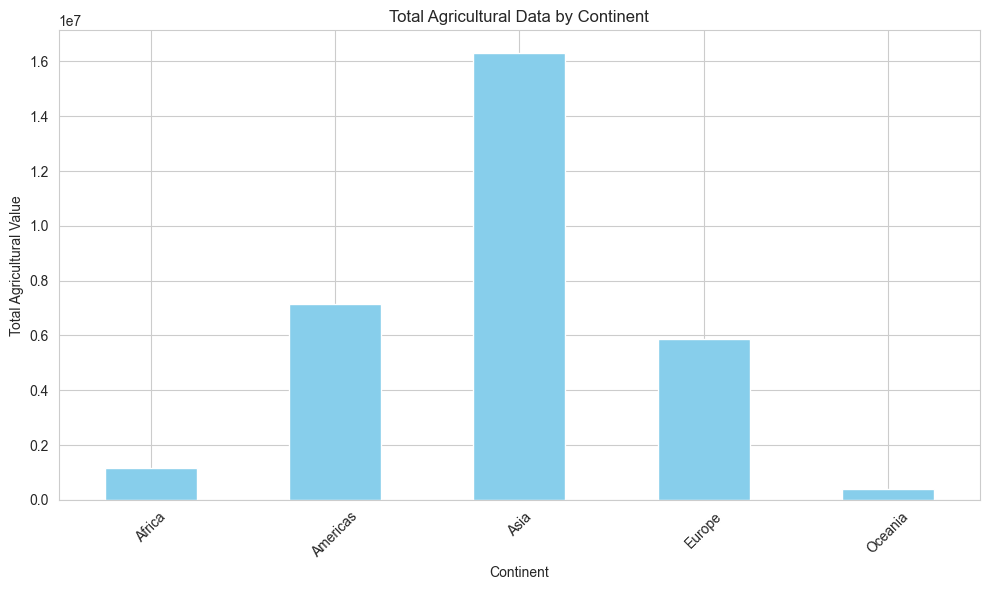

In [81]:
# Merge agricultur dataset with countries dataset
merged_data = pd.merge(agricultur, countries, left_on='Area', right_on='name')

# Aggregate agricultural data by continent
agriculture_by_continent = merged_data.groupby('region')['Value'].sum()

# Plot the aggregated agricultural data by continent
plt.figure(figsize=(10, 6))
agriculture_by_continent.plot(kind='bar', color='skyblue')
plt.title('Total Agricultural Data by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Agricultural Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [83]:
# Group by continent, year, and item, and calculate the sum of each item
grouped_data = merged_data.groupby(['region', 'Year', 'Item'])['Value'].sum().reset_index()

# Aggregate the grouped data by continent and year, and sum the values across all items
continent_year_totals = grouped_data.groupby(['region', 'Year'])['Value'].sum().reset_index()

# Plot the total sum of agricultural items for each continent per year
fig = px.bar(continent_year_totals, x='region', y='Value', color='Year',
             labels={'region': 'Continent', 'Value': 'Total Usage (kilotons)', 'Year': 'Year'}, 
             title='Total Usage of Agricultural Items by Continent per Year',
             barmode='group')

fig.show()


In [84]:
# Get the last year in the dataset
last_year = merged_data['Year'].max()

# Filter the data to include only the records for the last year
last_year_data = merged_data[merged_data['Year'] == last_year]

# Group by continent, item, and calculate the sum of each item
grouped_data = last_year_data.groupby(['region', 'Item'])['Value'].sum().reset_index()

# Aggregate the grouped data by continent and sum the values across all items
continent_totals = grouped_data.groupby('region')['Value'].sum().reset_index()

# Plot the total sum of agricultural items for each continent for the last year
fig = px.bar(continent_totals, x='region', y='Value', 
             labels={'region': 'Continent', 'Value': f'Total Usage in {last_year} (kilotons)'}, 
             title=f'Total Usage of Agricultural Items by Continent in {last_year}')

fig.show()


In [85]:
# Get the last year in the dataset
last_year = merged_data['Year'].max()

# Filter the data to include only the records for the last year
last_year_data = merged_data[merged_data['Year'] == last_year]

# Group by country, item, and calculate the sum of each item
grouped_data = last_year_data.groupby(['name', 'Item'])['Value'].sum().reset_index()

# Aggregate the grouped data by country and sum the values across all items
country_totals = grouped_data.groupby('name')['Value'].sum().reset_index()

# Plot the total sum of agricultural items for each country for the last year
fig = px.bar(country_totals, x='name', y='Value', 
             labels={'name': 'Country', 'Value': f'Total Usage in {last_year} (kilotons)'}, 
             title=f'Total Usage of Agricultural Items by Country in {last_year}')

fig.show()


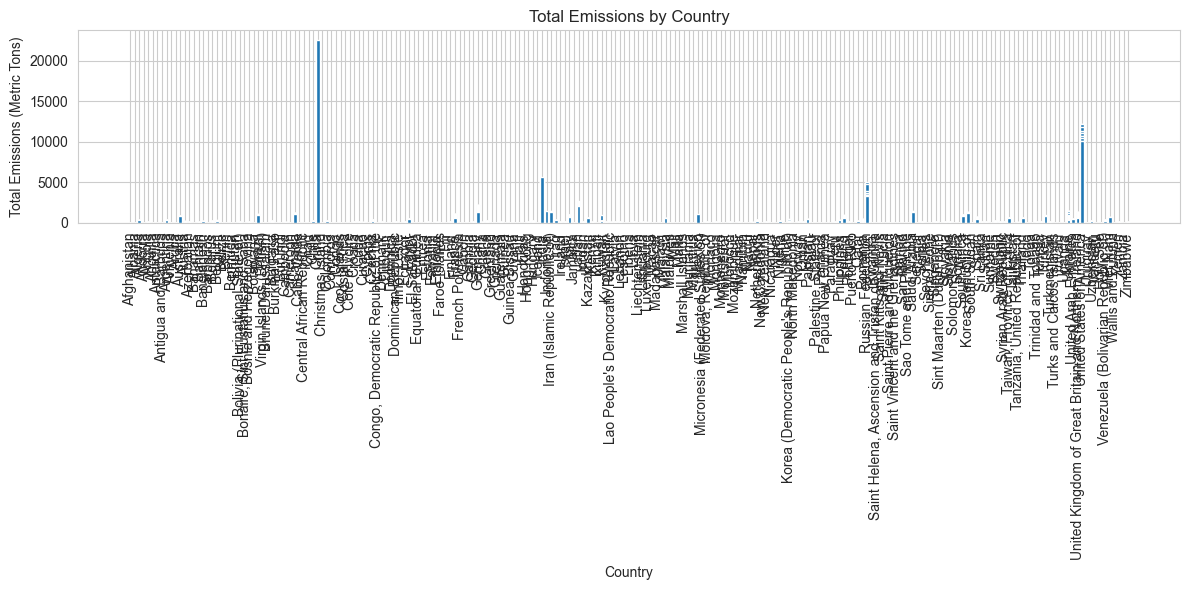

In [86]:
# Assuming 'iso_code' is the common column between 'co2' and 'countries' DataFrames
merged_df = pd.merge(co2, countries, left_on='iso_code', right_on='alpha-3', how='inner')

# Summing up emissions across different categories to get total emissions
merged_df['total_emissions'] = merged_df[['co2', 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_co2_per_capita']].sum(axis=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(merged_df['name'], merged_df['total_emissions'])
plt.xlabel('Country')
plt.ylabel('Total Emissions (Metric Tons)')
plt.title('Total Emissions by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_4616/3351941955.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



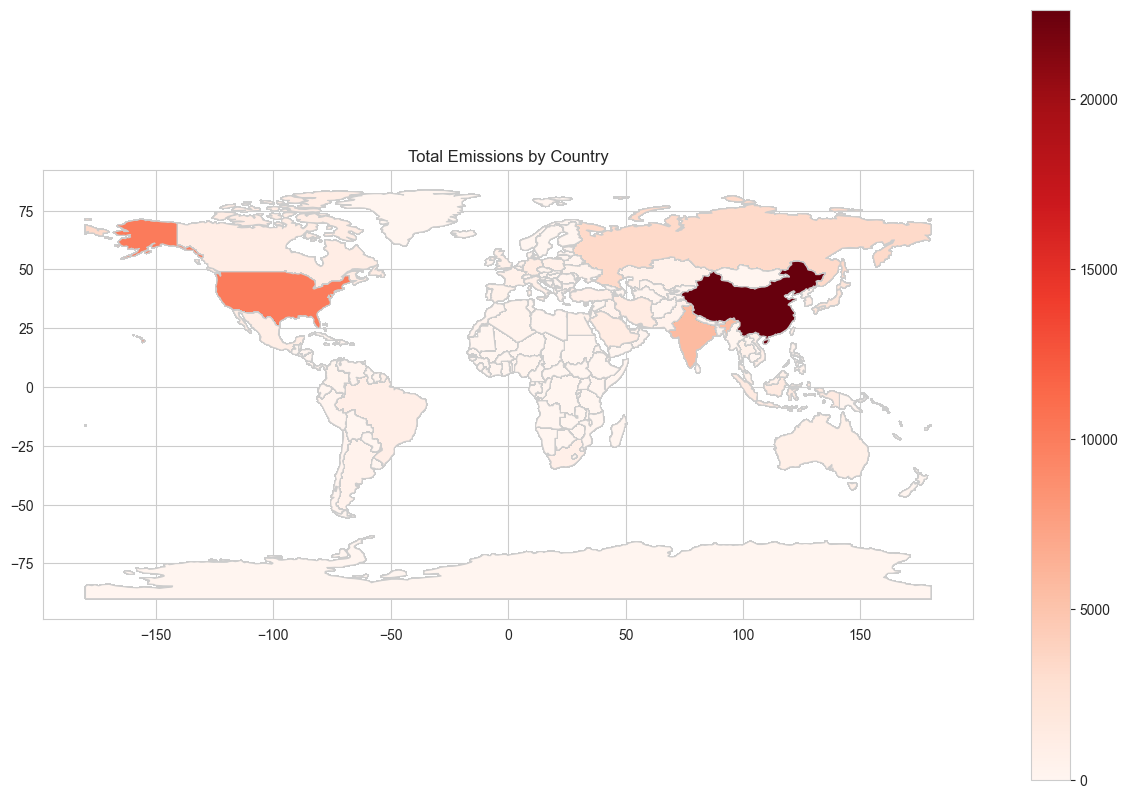

In [87]:
# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge emissions data with world shapefile
world = world.merge(merged_df, how='left', left_on='iso_a3', right_on='iso_code')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='total_emissions', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Total Emissions by Country')
plt.show()
